Daniil Abbruzzese
Github username: Daniilab
USC ID: 4721123667

In [111]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
import itertools
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score
from pdf2image import convert_from_path
from IPython.display import display, Image
from sklearn.preprocessing import LabelEncoder

# 1(a)

In [112]:

#STEP 1 - CREATE A DF FOR EACH DATASET

# Directory containing the data
data_dir = '../data/AReM/'

# Activities or folders in the directory
activities = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']

# Column names
column_names = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

# Dictionary to store each DataFrame
dataframes = {}

for activity in activities:
    # Path to the activity directory
    activity_dir = os.path.join(data_dir, activity)

    # Assuming the files are named 'dataset1.csv', 'dataset2.csv', etc.
    for i in range(1, 16):  # defining the number of datasets
        dataset_filename = f'dataset{i}.csv'
        dataset_filepath = os.path.join(activity_dir, dataset_filename)

        # Checking if file exists
        if os.path.exists(dataset_filepath):
            # Creating a DataFrame name based on the activity and dataset number
            df_name = f'{activity}_df_{i}'

            if df_name == 'bending2_df_4':
                dataframes[df_name] = pd.read_csv(dataset_filepath, sep=' ', skiprows=7, names=column_names, skipinitialspace=True, index_col=False)

            else:
                # Loading the data into the DataFrame and storing it in the dictionary
                dataframes[df_name] = pd.read_csv(dataset_filepath, comment='#', names=column_names)

# Now, `dataframes` is a dictionary where the keys are the DataFrame names and the values are the DataFrames themselves.

#bending1_df_5 = dataframes['bending1_df_1'] to access a single df


In [113]:
dataframes['bending2_df_4']

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0       500      32.75       0.43       1.00       0.00      18.00       0.00
1       750      32.50       0.50       0.00       0.00      17.50       0.50
2      1000      32.50       0.50       7.50       0.50      17.50       0.87
3      1250      32.67       0.47      11.00       1.00      16.75       0.83
4      1500      32.50       0.50       6.25       0.83      18.00       0.00
..      ...        ...        ...        ...        ...        ...        ...
473  118750      28.67       0.47       4.67       1.25      17.33       0.47
474  119000      27.50       0.50       5.50       2.50      17.25       1.30
475  119250      28.00       0.00       6.67       0.94      17.00       1.00
476  119500      28.00       0.00       5.00       0.82      17.00       0.71
477  119750      28.00       0.00       0.00       0.00      17.00       1.00

[478 rows x 7 columns]

# 1(b)

In [114]:
# STEP 2 - SEPERATE INTO TRAIN AND TEST DFS for each activity


# Dictionaries to store train and test DataFrames for each activity
train_dataframes = {}
test_dataframes = {}

for activity in activities:
    # Lists to store DataFrames for the current activity
    train_dfs = []
    test_dfs = []

    # Determine the test dataset numbers based on the activity
    if activity in ['bending1', 'bending2']:
        test_dataset_numbers = [1, 2]
    else:
        test_dataset_numbers = [1, 2, 3]

    # Iterate over the datasets for the current activity
    for i in range(1, 16):  # Adjust the range based on the number of datasets
        df_name = f'{activity}_df_{i}'

        # Check if the DataFrame exists in the `dataframes` dictionary
        if df_name in dataframes:
            # Add the DataFrame to the appropriate list (train or test)
            if i in test_dataset_numbers:
                test_dfs.append(dataframes[df_name])

                print(f'appended {df_name} to test_dfs')
            else:
                train_dfs.append(dataframes[df_name])
                print(f'appended {df_name} to train_dfs')

    # Concatenate the DataFrames in each list to create a single DataFrame for train and test
    if train_dfs:
        train_dataframes[activity] = pd.concat(train_dfs, ignore_index=True)
    if test_dfs:
        test_dataframes[activity] = pd.concat(test_dfs, ignore_index=True)

# Now, `train_dataframes` and `test_dataframes` are dictionaries 
# where the keys are the activity names and the values are the combined train and test DataFrames for each activity.
# example for how to retrieve test data for bending1: test_dataframes['bending1']


appended bending1_df_1 to test_dfs
appended bending1_df_2 to test_dfs
appended bending1_df_3 to train_dfs
appended bending1_df_4 to train_dfs
appended bending1_df_5 to train_dfs
appended bending1_df_6 to train_dfs
appended bending1_df_7 to train_dfs
appended bending2_df_1 to test_dfs
appended bending2_df_2 to test_dfs
appended bending2_df_3 to train_dfs
appended bending2_df_4 to train_dfs
appended bending2_df_5 to train_dfs
appended bending2_df_6 to train_dfs
appended cycling_df_1 to test_dfs
appended cycling_df_2 to test_dfs
appended cycling_df_3 to test_dfs
appended cycling_df_4 to train_dfs
appended cycling_df_5 to train_dfs
appended cycling_df_6 to train_dfs
appended cycling_df_7 to train_dfs
appended cycling_df_8 to train_dfs
appended cycling_df_9 to train_dfs
appended cycling_df_10 to train_dfs
appended cycling_df_11 to train_dfs
appended cycling_df_12 to train_dfs
appended cycling_df_13 to train_dfs
appended cycling_df_14 to train_dfs
appended cycling_df_15 to train_dfs
appended

### the code above seperates the data into test and train dfs for each activity

# 1(c) i 

# Answer:
- Mean 
- Standard Deviation/Variance
- Max / min values
- Skewness: Measures the asymmetry of the data distribution. 
- Kurtosis: Indicates the shape of the data distribution (heaviness of tails).
- Root Mean Square: Provides a measure of the magnitude of the data. 
- Zero Crossing Rate: Counts the number of times the signal changes sign.

# 1(c) ii 

In [115]:
#Creating feature extraction df

# Column names excluding the time variable
column_names = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']


# Initialize a list to store the feature data. This is a list of dictionaries, where each dictionary represents feature data for each df
feature_data = []

# Iterate through each DataFrame in the dictionary. df_name = key (the name of the df) and df = value (the dataframe itself)
for df_name, df in dataframes.items():
    # Exclude the time column
    time_series_data = df[column_names]
    
    # Initialize a dictionary to store features. This is the first key-value pair to signl which df we are on 
    features = {'df_name': df_name}
    
    # Iterate through each time series in the DataFrame. This is adding additional key value pairs for the features min, max, etc
    for col in time_series_data.columns:
        # Calculate the desired statistics
        features[f'{col}_min'] = time_series_data[col].min()
        features[f'{col}_max'] = time_series_data[col].max()
        features[f'{col}_mean'] = time_series_data[col].mean()
        features[f'{col}_median'] = time_series_data[col].median()
        features[f'{col}_std'] = time_series_data[col].std()
        features[f'{col}_q1'] = time_series_data[col].quantile(0.25)
        features[f'{col}_q3'] = time_series_data[col].quantile(0.75)

    # Append the features dictionary to the feature_data list
    feature_data.append(features)

# Convert the feature_data list to a DataFrame
features_df = pd.DataFrame(feature_data)

# Set the option to display all columns
pd.set_option('display.max_columns', None)

# In this df, each column represents one of the time domain features. Each row is a single df. 
features_df




df_name  avg_rss12_min  avg_rss12_max  avg_rss12_mean  \
0   bending1_df_1          37.25          45.00       40.624792   
1   bending1_df_2          38.00          45.67       42.812812   
2   bending1_df_3          35.00          47.40       43.954500   
3   bending1_df_4          33.00          47.75       42.179812   
4   bending1_df_5          33.00          45.75       41.678063   
..            ...            ...            ...             ...   
83  walking_df_11          19.50          45.33       33.586875   
84  walking_df_12          19.75          45.50       34.322750   
85  walking_df_13          19.50          46.00       34.546229   
86  walking_df_14          23.50          46.25       34.873229   
87  walking_df_15          19.25          44.00       34.473188   

    avg_rss12_median  avg_rss12_std  avg_rss12_q1  avg_rss12_q3  \
0              40.50       1.476967         39.25       42.0000   
1              42.50       1.435550         42.00       43.6700   
2              44.33       1.558835         43.00       45.0000   
3              43.50       3.670666         39.15       45.0000   
4              41.75       2.243490         41.33       42.7500   
..               ...            ...           ...           ...   
83             34.25       4.650935         30.25       37.0000   
84             35.25       4.752477         31.00       38.0000   
85             35.25       4.842294         31.25       37.8125   
86             35.25       4.531720         31.75       38.2500   
87             35.00       4.796705         31.25       38.0000   

    var_rss12_min  var_rss12_max  var_rss12_mean  var_rss12_median  \
0             0.0           1.30        0.358604             0.430   
1             0.0           1.22        0.372437             0.470   
2             0.0           1.70        0.426250             0.470   
3             0.0           3.00        0.696042             0.500   
4             0.0           2.83        0.535979             0.500   
..            ...            ...             ...               ...   
83            0.0          14.67        4.576562             4.260   
84            0.0          13.47        4.456333             3.900   
85            0.0          12.47        4.371958             4.135   
86            0.0          14.82        4.380583             3.925   
87            0.0          13.86        4.359312             3.960   

    var_rss12_std  var_rss12_q1  var_rss12_q3  avg_rss13_min  avg_rss13_max  \
0        0.322605          0.00        0.5000           4.00          29.50   
1        0.289158          0.00        0.5000           2.00          29.50   
2        0.338690          0.00        0.5000           6.50          29.75   
3        0.630860          0.00        1.1200           8.50          30.00   
4        0.405469          0.43        0.7100           3.00          28.25   
..            ...           ...           ...            ...            ...   
83       2.461077          2.87        6.1050           7.33          23.25   
84       2.599284          2.49        5.9700           6.25          22.25   
85       2.360448          2.49        5.8000           7.00          22.67   
86       2.435437          2.50        5.9325           6.67          24.25   
87       2.388746          2.49        5.9000           6.00          22.75   

    avg_rss13_mean  avg_rss13_median  avg_rss13_std  avg_rss13_q1  \
0        19.040937            19.250       4.462952         16.00   
1        20.096979            21.000       3.893737         19.00   
2        22.122354            23.000       3.030943         19.75   
3        22.183625            23.000       3.810469         20.50   
4        19.006563            19.125       4.087107         16.50   
..             ...               ...            ...           ...   
83       15.317854            15.330       2.970440         13.25   
84       15.209771            15.250       2.711022       

# 1(c) iii


In [116]:
std_devs = features_df.drop(columns=['df_name']).std()

std_devs_df = pd.DataFrame({
    'feauture': std_devs.index,
    'std_dev' : std_devs.values
    })


std_devs_df

feauture   std_dev
0      avg_rss12_min  9.569975
1      avg_rss12_max  4.394362
2     avg_rss12_mean  5.335926
3   avg_rss12_median  5.440054
4      avg_rss12_std  1.772277
5       avg_rss12_q1  6.153590
6       avg_rss12_q3  5.140948
7      var_rss12_min  0.000000
8      var_rss12_max  5.062729
9     var_rss12_mean  1.574194
10  var_rss12_median  1.412244
11     var_rss12_std  0.884120
12      var_rss12_q1  0.946386
13      var_rss12_q3  2.125266
14     avg_rss13_min  2.956462
15     avg_rss13_max  4.875137
16    avg_rss13_mean  4.008010
17  avg_rss13_median  4.036396
18     avg_rss13_std  0.946648
19      avg_rss13_q1  4.220658
20      avg_rss13_q3  4.171628
21     var_rss13_min  0.000000
22     var_rss13_max  2.183625
23    var_rss13_mean  1.166078
24  var_rss13_median  1.145586
25     var_rss13_std  0.458222
26      var_rss13_q1  0.843620
27      var_rss13_q3  1.552504
28     avg_rss23_min  6.124001
29     avg_rss23_max  5.741238
30    avg_rss23_mean  5.674085
31  avg_rss23_median  5.813782
32     avg_rss23_std  1.024744
33      avg_rss23_q1  6.095489
34      avg_rss23_q3  5.531720
35     var_rss23_min  0.045838
36     var_rss23_max  2.518921
37    var_rss23_mean  1.154756
38  var_rss23_median  1.086474
39     var_rss23_std  0.517593
40      var_rss23_q1  0.758584
41      var_rss23_q3  1.523599

### Bootstrapping steps


1. make a bootstrapped dataset
2. calculate the sd for each feature, keep track
3. repeat many times (let's say 1000 times)
4. Based on distriubtion of the 1000 sd's find the middle 90 percent of values for sd for each feature

In [117]:
# bootstrap confidence interval

#initialize a list to store the boostrapped standard deviations
bootstrap_std_devs = []

#running for loop 1000 times to get 1000 boostrapped samples
for _ in range(1000):  

    #creating a new sample from features df 
    sample = features_df.drop(columns=['df_name']).sample(n=len(features_df), replace=True)

    #calculate sd and append this new sample df to the list
    bootstrap_std_devs.append(sample.std())

#converting to numpy array for efficient computation  
bootstrap_std_devs = np.array(bootstrap_std_devs)

#generating the confidence intervil 
ci_lower = np.percentile(bootstrap_std_devs, 5, axis=0)
ci_upper = np.percentile(bootstrap_std_devs, 95, axis=0)



In [118]:

# Assuming feature_names is a list of your feature names
feature_names = features_df.drop(columns=['df_name']).columns

# Creating a DataFrame to display the results
ci_df = pd.DataFrame({
    'Feature': feature_names,
    'Lower Bound': ci_lower,
    'Upper Bound': ci_upper
})

# Displaying the for 90 percent boostrap confidence interval 
ci_df


Feature  Lower Bound  Upper Bound
0      avg_rss12_min     8.210232    10.773953
1      avg_rss12_max     3.292484     5.300780
2     avg_rss12_mean     4.697776     5.880706
3   avg_rss12_median     4.825719     6.008214
4      avg_rss12_std     1.573760     1.942330
5       avg_rss12_q1     5.589080     6.654572
6       avg_rss12_q3     4.344582     5.855344
7      var_rss12_min     0.000000     0.000000
8      var_rss12_max     4.671489     5.370988
9     var_rss12_mean     1.405214     1.697894
10  var_rss12_median     1.250886     1.539886
11     var_rss12_std     0.808424     0.939424
12      var_rss12_q1     0.841067     1.035997
13      var_rss12_q3     1.902580     2.290629
14     avg_rss13_min     2.767792     3.110154
15     avg_rss13_max     4.167599     5.467451
16    avg_rss13_mean     3.455574     4.469146
17  avg_rss13_median     3.464682     4.529704
18     avg_rss13_std     0.766091     1.116981
19      avg_rss13_q1     3.637273     4.696265
20      avg_rss13_q3     3.593843     4.689995
21     var_rss13_min     0.000000     0.000000
22     var_rss13_max     1.969348     2.356833
23    var_rss13_mean     1.086369     1.221334
24  var_rss13_median     1.064422     1.199466
25     var_rss13_std     0.422148     0.484915
26      var_rss13_q1     0.779091     0.889029
27      var_rss13_q3     1.445177     1.624086
28     avg_rss23_min     4.477504     7.525789
29     avg_rss23_max     4.709309     6.559217
30    avg_rss23_mean     4.456433     6.725874
31  avg_rss23_median     4.547509     6.904686
32     avg_rss23_std     0.802636     1.219682
33      avg_rss23_q1     4.859524     7.202605
34      avg_rss23_q3     4.359006     6.533073
35     var_rss23_min     0.000000     0.078476
36     var_rss23_max     2.255719     2.780567
37    var_rss23_mean     1.067772     1.214833
38  var_rss23_median     0.999158     1.146407
39     var_rss23_std     0.480700     0.546091
40      var_rss23_q1     0.691486     0.807489
41      var_rss23_q3     1.410414     1.597280

# 1 (c) iv

### Answer: the three most important features, in my opinion, are min, max, and mean.

# HW 4 STARTS HERE


# 2(a) Binary Classification Using Logistic Regression

# 2(a)i

Assume that you want to use the training set to classify bending from other
activities, i.e. you have a binary classification problem. Depict scatter plots
of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of
each instance, and use color to distinguish bending vs. other activities. (See
p. 129 of the textbook).

In [119]:
# STEP ONE: TRAIN TEST SPLIT

train_dataframes = {}
test_dataframes = {}

train_dfs = []
test_dfs = []

for activity in activities:


    for i in range(1, 16):  # Assuming you have datasets numbered from 1 to 15
        df_name = f'{activity}_df_{i}'
        #print(f"Processing: {activity}, Dataset: {i}")
        
        if df_name in dataframes:
            is_test = (i in [1, 2]) or (activity not in ['bending1', 'bending2'] and i in [1, 2, 3])
            
            if is_test:
                test_dfs.append(dataframes[df_name])
                test_dataframes[df_name] = test_dfs


                df_name = f'{activity}_df_{i}'
                # Loading the data into the DataFrame and storing it in the dictionary
                test_dataframes[df_name] = dataframes[df_name]

                #print(f"Added to test_dfs: {df_name}")

            else:
                train_dataframes[df_name] = dataframes[df_name]
                #print(f"{df_name} appended to train_dfs")
                



In [120]:
train_dataframes['bending1_df_3']

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0         0      42.00       0.71      21.25       0.43      30.00       0.00
1       250      41.50       0.50      20.25       1.48      31.25       1.09
2       500      41.50       0.50      14.25       1.92      33.00       0.00
3       750      40.75       0.83      15.75       0.43      33.00       0.00
4      1000      40.00       0.71      20.00       2.74      32.75       0.43
..      ...        ...        ...        ...        ...        ...        ...
475  118750      42.50       0.50      20.00       0.82      36.00       0.00
476  119000      42.67       0.47      21.00       0.00      36.33       0.47
477  119250      44.33       0.94      21.00       0.00      36.33       0.47
478  119500      45.25       0.43      26.75       1.79      36.00       0.00
479  119750      47.25       0.83      29.75       0.43      35.25       1.30

[480 rows x 7 columns]

In [121]:
#STEP 2: EXTRACT MIN, MEAN, MAX of avg_rss12,var_rss12, and, var_rss23 for each instance of the training dataset 


#Creating feature extraction df

# Column names excluding the time variable
column_names = ['avg_rss12', 'var_rss12', 'var_rss23']


# Initialize a list to store the feature data. This is a list of dictionaries, where each dictionary represents feature data for each df
feature_data = []

# Iterate through each DataFrame in the dictionary. df_name = key (the name of the df) and df = value (the dataframe itself)
for df_name, df in train_dataframes.items():
    # Exclude the time column
    time_series_data = df[column_names]
    
    # Initialize a dictionary to store features. This is the first key-value pair to signl which df we are on 
    features = {'df_name': df_name}
    
    # Iterate through each time series in the DataFrame. This is adding additional key value pairs for the features min, max, etc
    for col in time_series_data.columns:
        # Calculate the desired statistics
        features[f'{col}_min'] = time_series_data[col].min()
        features[f'{col}_max'] = time_series_data[col].max()
        features[f'{col}_mean'] = time_series_data[col].mean()
        

    # Append the features dictionary to the feature_data list
    feature_data.append(features)

# Convert the feature_data list to a DataFrame
features_df = pd.DataFrame(feature_data)

# Set the option to display all columns
pd.set_option('display.max_columns', None)

# In this df, each column represents one of the time domain features. Each row is a single df. 
features_df




df_name  avg_rss12_min  avg_rss12_max  avg_rss12_mean  \
0   bending1_df_3          35.00          47.40       43.954500   
1   bending1_df_4          33.00          47.75       42.179812   
2   bending1_df_5          33.00          45.75       41.678063   
3   bending1_df_6          37.00          48.00       43.454958   
4   bending1_df_7          36.25          48.00       43.969125   
..            ...            ...            ...             ...   
64  walking_df_11          19.50          45.33       33.586875   
65  walking_df_12          19.75          45.50       34.322750   
66  walking_df_13          19.50          46.00       34.546229   
67  walking_df_14          23.50          46.25       34.873229   
68  walking_df_15          19.25          44.00       34.473188   

    var_rss12_min  var_rss12_max  var_rss12_mean  var_rss23_min  \
0             0.0           1.70        0.426250           0.00   
1             0.0           3.00        0.696042           0.00   
2             0.0           2.83        0.535979           0.00   
3             0.0           1.58        0.378083           0.00   
4             0.0           1.50        0.413125           0.00   
..            ...            ...             ...            ...   
64            0.0          14.67        4.576562           0.00   
65            0.0          13.47        4.456333           0.00   
66            0.0          12.47        4.371958           0.00   
67            0.0          14.82        4.380583           0.00   
68            0.0          13.86        4.359312           0.43   

    var_rss23_max  var_rss23_mean  
0            1.79        0.493292  
1            2.18        0.613521  
2            1.79        0.383292  
3            5.26        0.679646  
4            2.96        0.555312  
..            ...             ...  
64           8.32        3.259729  
65           9.67        3.432563  
66          10.00        3.338125  
67           9.51        3.424646  
68           9.00        3.340458  

[69 rows x 10 columns]

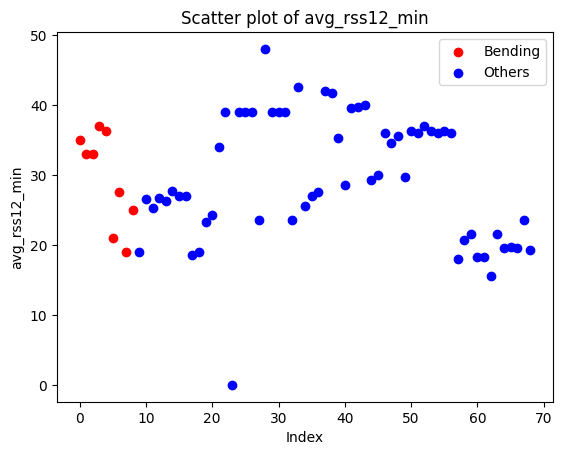

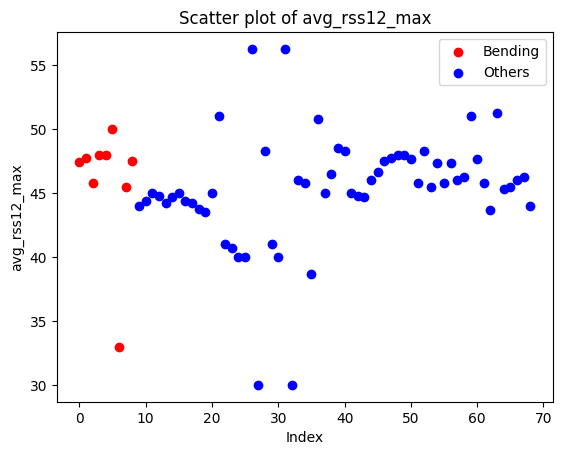

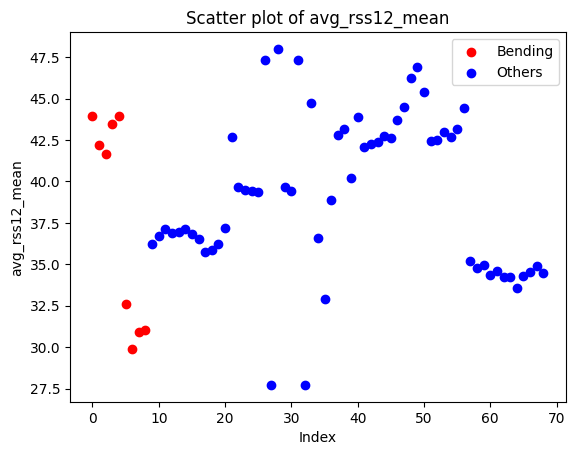

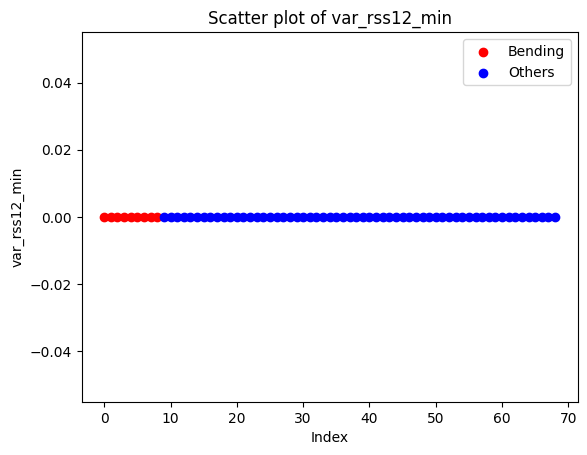

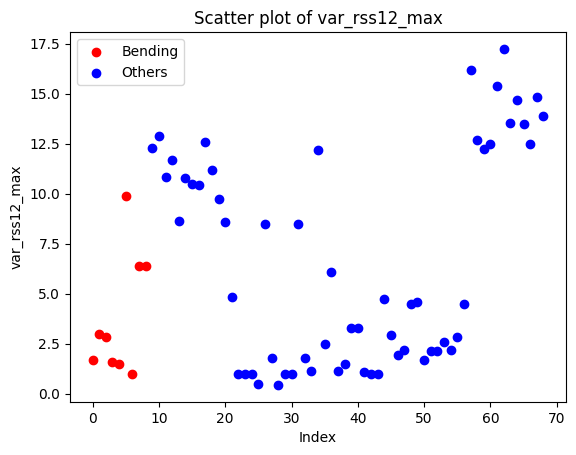

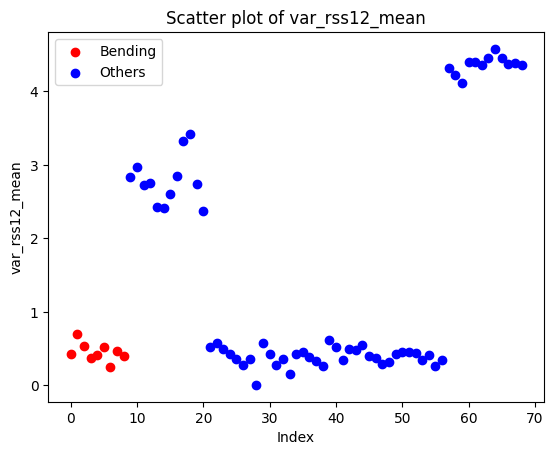

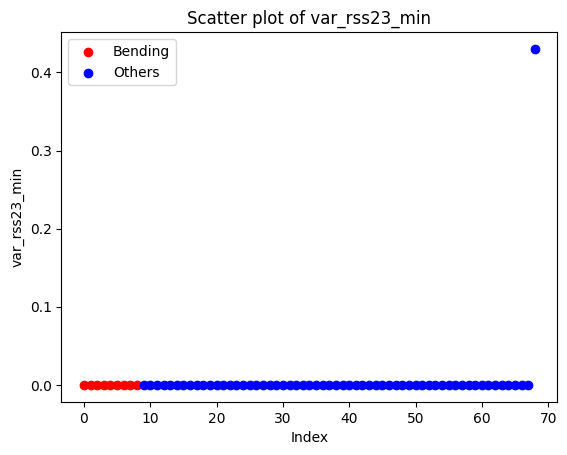

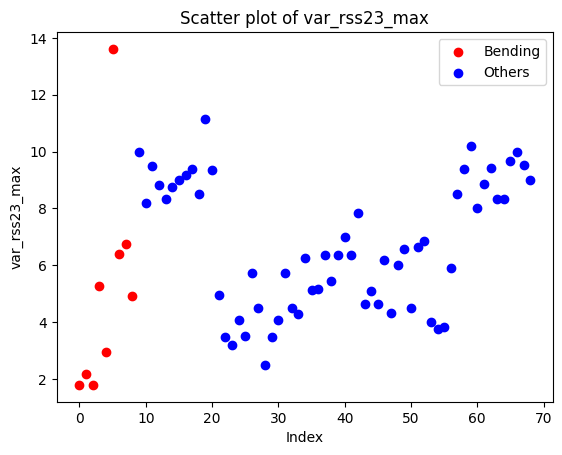

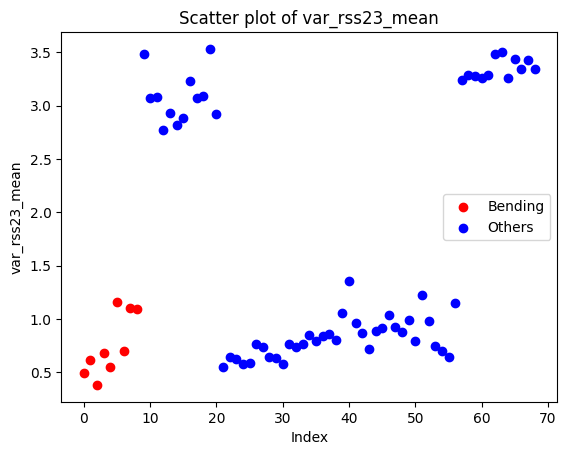

In [122]:

#STEP 3 - Create scatter plots showing color to distinguish bending vs. other activities.


#filtering out bending into a diff dataframe

df_bending_train = features_df[features_df['df_name'].str.contains('bending')]

df_others_train = features_df[~features_df['df_name'].str.contains('bending')]


features = ['avg_rss12_min', 'avg_rss12_max', 'avg_rss12_mean',
       'var_rss12_min', 'var_rss12_max', 'var_rss12_mean', 'var_rss23_min',
       'var_rss23_max', 'var_rss23_mean']

    
for feature in features:    
    # Create a scatter plot for df_bending_train with red color
    plt.scatter(df_bending_train.index, df_bending_train[feature], color='red', label='Bending')

    # Create a scatter plot for df_others_train with blue color
    plt.scatter(df_others_train.index, df_others_train[feature], color='blue', label='Others')

    # Adding title and labels
    plt.title(f'Scatter plot of {feature}')
    plt.xlabel('Index')
    plt.ylabel(f'{feature}')

    # Adding legend to specify which color represents which DataFrame
    plt.legend()

    # Display the plot
    plt.show()


# 2(a)ii

Break each time series in your training set into two (approximately) equal
length time series. Now instead of 6 time series for each of the training
instances, you have 12 time series for each training instance. Repeat the
experiment in 2(a)i, i.e depict scatter plots of the features extracted from both
parts of the time series 1,2, and 6. Do you see any considerable difference in
the results with those of 2(a)i?

In [123]:
# STEP 1: SPLIT TRAINING DATA into halves

#train_dataframes['bending1_df_5']

# Create an empty dictionary to store the halved DataFrames
train_dataframes_halved = {}

for df_name, df in train_dataframes.items():
    df = df.drop('time', axis = 1)

    # Calculate the midpoint index for splitting
    midpoint = len(df) // 2

    # Split the DataFrame's columns into two halves
    first_half = df.iloc[:midpoint, :]

    second_half = df.iloc[midpoint:, :]

    # Rename the columns in the second half with "part 2" suffix
    second_half.columns = [f'{col}_part2' for col in second_half.columns]

    # Reset the index 
    second_half.reset_index(drop=True, inplace=True)

    # Concatenate the two halves horizontally to create df_split
    df_halved = pd.concat([first_half, second_half], axis=1)

            # Define the new order of columns
    new_order = ['avg_rss12', 'avg_rss12_part2', 'var_rss12', 'var_rss12_part2', 'avg_rss13', 'avg_rss13_part2', 'var_rss13', 'var_rss13_part2', 'avg_rss23',	'avg_rss23_part2', 'var_rss23', 'var_rss23_part2']

        # Reorder the columns based on the new order
    df_halved  =  df_halved[new_order]

    # Store the halved DataFrame in the new dictionary with the same key
    train_dataframes_halved[df_name] = df_halved



train_dataframes_halved['bending2_df_4']

avg_rss12  avg_rss12_part2  var_rss12  var_rss12_part2  avg_rss13  \
0        32.75            29.50       0.43             0.50       1.00   
1        32.50            29.50       0.50             0.50       0.00   
2        32.50            29.00       0.50             0.00       7.50   
3        32.67            29.25       0.47             0.43      11.00   
4        32.50            29.00       0.50             0.00       6.25   
..         ...              ...        ...              ...        ...   
234      29.25            28.67       0.43             0.47       6.50   
235      29.00            27.50       0.00             0.50       6.25   
236      29.00            28.00       0.00             0.00       6.00   
237      29.25            28.00       0.43             0.00       5.50   
238      29.25            28.00       0.43             0.00       5.00   

     avg_rss13_part2  var_rss13  var_rss13_part2  avg_rss23  avg_rss23_part2  \
0               5.00       0.00             0.71      18.00            16.50   
1               6.00       0.00             0.00      17.50            16.50   
2               6.25       0.50             0.43      17.50            16.00   
3               6.25       1.00             0.43      16.75            15.75   
4               6.00       0.83             0.00      18.00            15.50   
..               ...        ...              ...        ...              ...   
234             4.67       0.50             1.25      16.50            17.33   
235             5.50       0.83             2.50      16.50            17.25   
236             6.67       0.00             0.94      16.25            17.00   
237             5.00       0.50             0.82      16.50            17.00   
238             0.00       0.00             0.00      17.00            17.00   

     var_rss23  var_rss23_part2  
0         0.00             0.50  
1         0.50             0.50  
2         0.87             1.00  
3         0.83             0.83  
4         0.00             0.50  
..         ...              ...  
234       1.12             0.47  
235       0.50             1.30  
236       0.83             1.00  
237       0.50             0.71  
238       1.00             1.00  

[239 rows x 12 columns]

In [124]:
#STEP 2: EXTRACT MIN, MEAN, MAX of avg_rss12,var_rss12, and, var_rss23 for each instance of the HALVED trainning dataset


#Creating feature extraction df

# Column names excluding the time variable
column_names = ['avg_rss12','avg_rss12_part2', 'var_rss12', 'var_rss12_part2',	'var_rss23', 'var_rss23_part2']


# Initialize a list to store the feature data. This is a list of dictionaries, where each dictionary represents feature data for each df
feature_data = []

# Iterate through each DataFrame in the dictionary. df_name = key (the name of the df) and df = value (the dataframe itself)
for df_name, df in train_dataframes_halved.items():

    # Exclude irrelvent columns
    df_split = df[column_names]
    
    # Initialize a dictionary to store features. This is the first key-value pair to signl which df we are on 
    features = {'df_name': df_name}
    
    # Iterate through each time series in the DataFrame. This is adding additional key value pairs for the features min, max, etc
    for col in df_split.columns:
        # Calculate the desired statistics
        features[f'{col}_min'] = df_split[col].min()
        features[f'{col}_max'] = df_split[col].max()
        features[f'{col}_mean'] = df_split[col].mean()
        

    # Append the features dictionary to the feature_data list
    feature_data.append(features)

# Convert the feature_data list to a DataFrame
features_df_halved = pd.DataFrame(feature_data)

# Set the option to display all columns
pd.set_option('display.max_columns', None)

# In this df, each column represents one of the time domain features. Each row is a single df. 
features_df_halved


df_name  avg_rss12_min  avg_rss12_max  avg_rss12_mean  \
0   bending1_df_3          36.50          46.50       44.057167   
1   bending1_df_4          33.75          47.75       43.278875   
2   bending1_df_5          33.00          45.75       41.621208   
3   bending1_df_6          39.00          48.00       44.117042   
4   bending1_df_7          36.67          45.00       43.486208   
..            ...            ...            ...             ...   
64  walking_df_11          19.50          45.00       33.334500   
65  walking_df_12          20.33          44.50       34.036750   
66  walking_df_13          19.50          43.33       34.033875   
67  walking_df_14          24.33          44.00       34.920792   
68  walking_df_15          19.25          44.00       34.916792   

    avg_rss12_part2_min  avg_rss12_part2_max  avg_rss12_part2_mean  \
0                 35.00                47.40             43.851833   
1                 33.00                46.00             41.080750   
2                 39.25                43.67             41.734917   
3                 37.00                46.50             42.792875   
4                 36.25                48.00             44.452042   
..                  ...                  ...                   ...   
64                22.25                45.33             33.839250   
65                19.75                45.50             34.608750   
66                20.25                46.00             35.058583   
67                23.50                46.25             34.825667   
68                20.75                43.33             34.029583   

    var_rss12_min  var_rss12_max  var_rss12_mean  var_rss12_part2_min  \
0             0.0           1.50        0.381042                 0.00   
1             0.0           3.00        0.673292                 0.00   
2             0.0           2.83        0.623083                 0.00   
3             0.0           1.30        0.250042                 0.00   
4             0.0           1.30        0.378667                 0.00   
..            ...            ...             ...                  ...   
64            0.0          11.78        4.408083                 0.00   
65            0.0          13.47        4.778292                 0.00   
66            0.0          12.47        4.574625                 0.00   
67            0.0          14.82        4.177958                 0.43   
68            0.0          13.86        4.262333                 0.00   

    var_rss12_part2_max  var_rss12_part2_mean  var_rss23_min  var_rss23_max  \
0                  1.70              0.471458           0.00           1.79   
1                  2.86              0.718792           0.00           1.53   
2                  1.12              0.448875           0.00           1.79   
3                  1.58              0.506125           0.00           5.26   
4                  1.50              0.447583           0.00           2.28   
..                  ...                   ...            ...            ...   
64                14.67              4.745042           0.00           8.29   
65                12.50              4.134375           0.47           8.41   
66                12.28              4.169292           0.00          10.00   
67                12.26              4.583208           0.00           9.18   
68                12.97              4.456292           0.43           9.00   

    var_rss23_mean  var_rss23_part2_min  var_rss23_part2_max  \
0         0.598250                 0.00                 1.50   
1         0.640958                 0.00                 2.18   
2         0.419083                 0.00                 1.50   
3         0.815417                 0.00                 4.06   
4         0.524875                 0.00                 2.96   
..             ...                  ...                  ...   
64        3.229167                 0.43                 8.32   
65        3.543708        

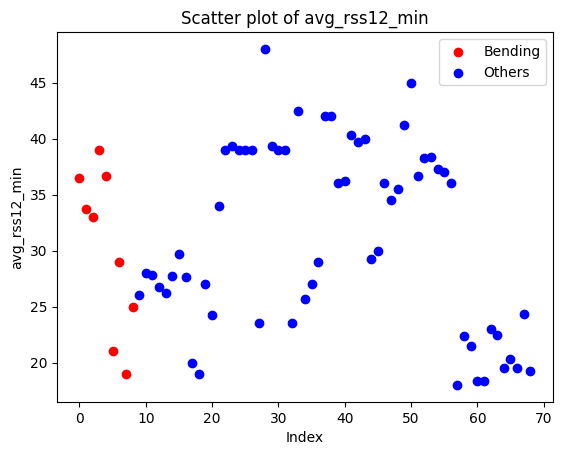

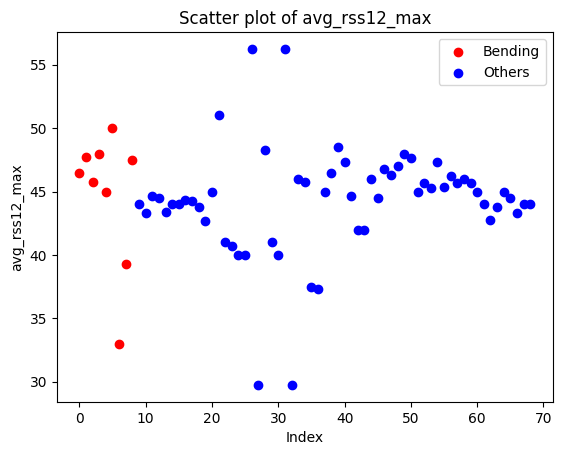

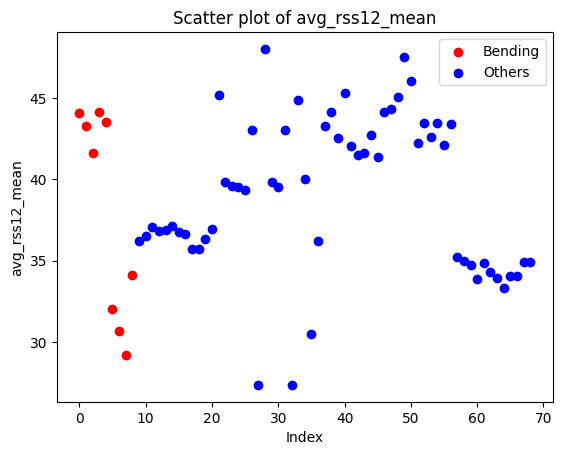

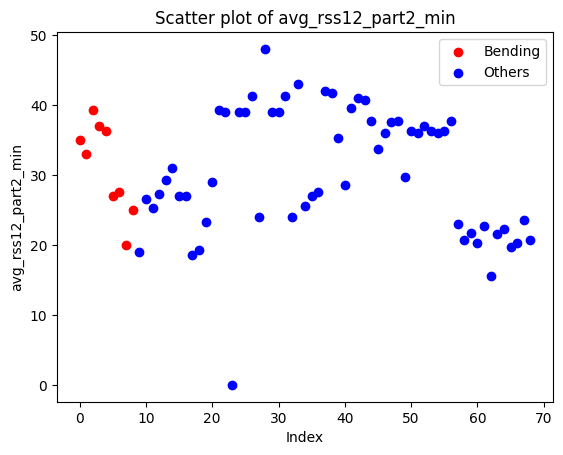

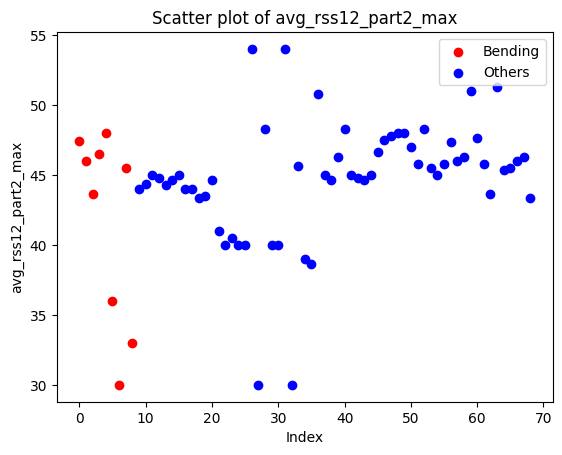

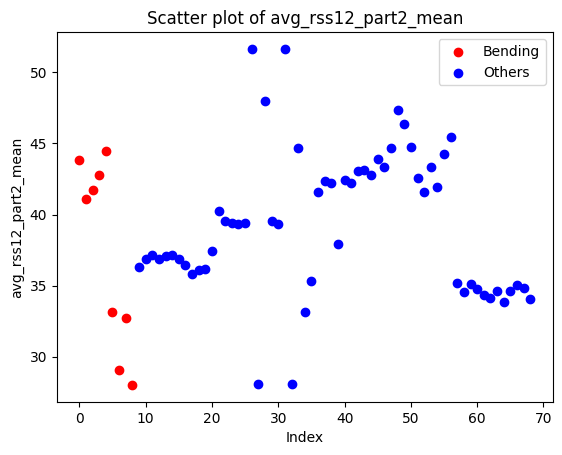

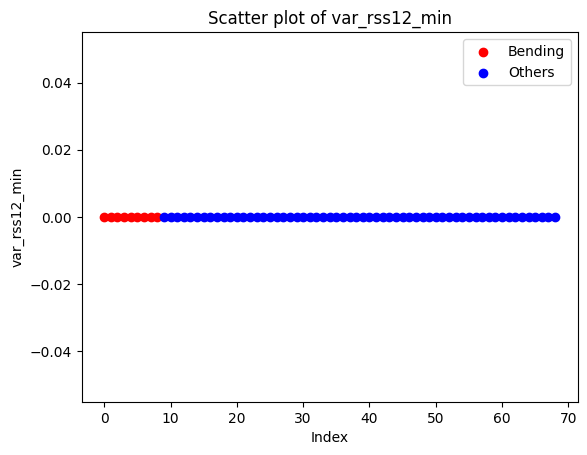

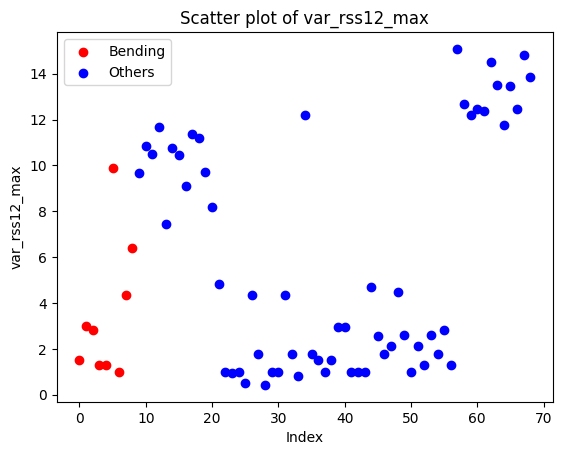

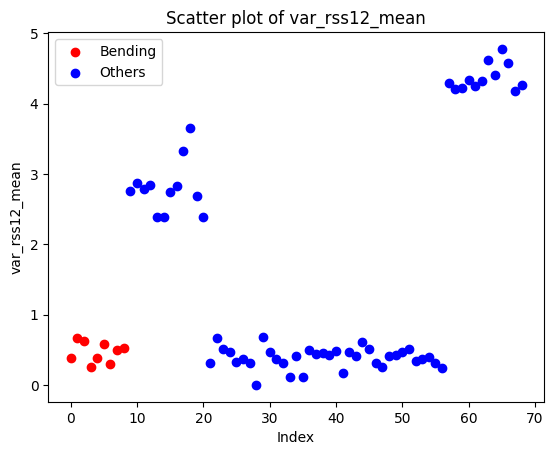

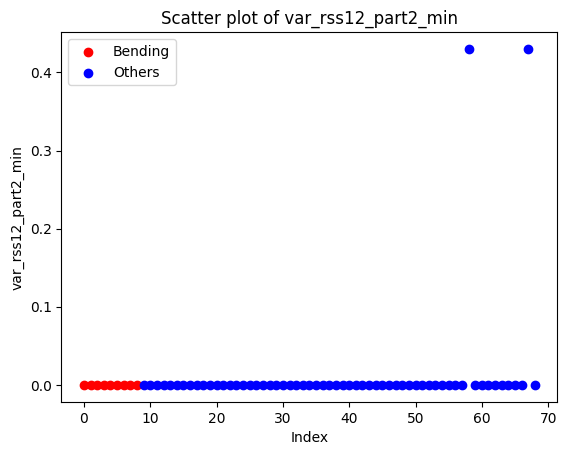

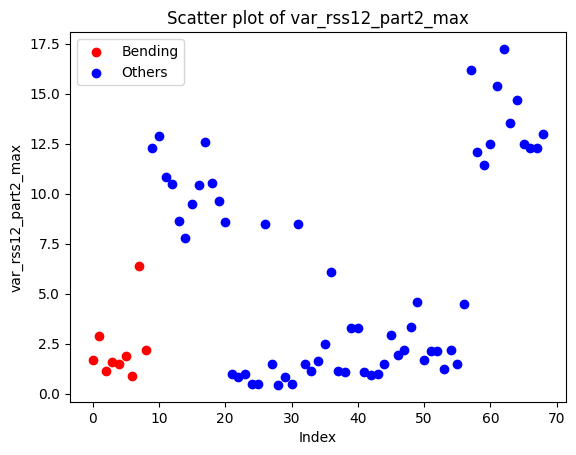

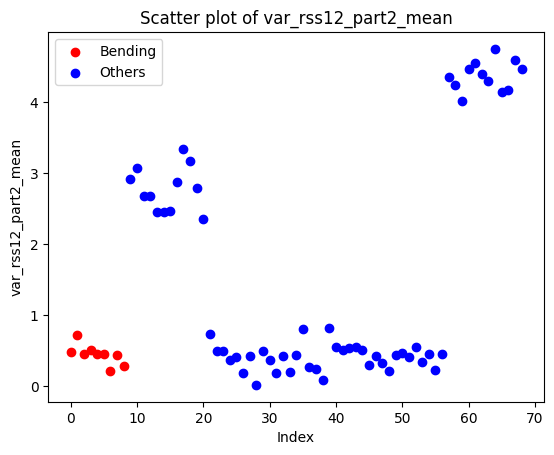

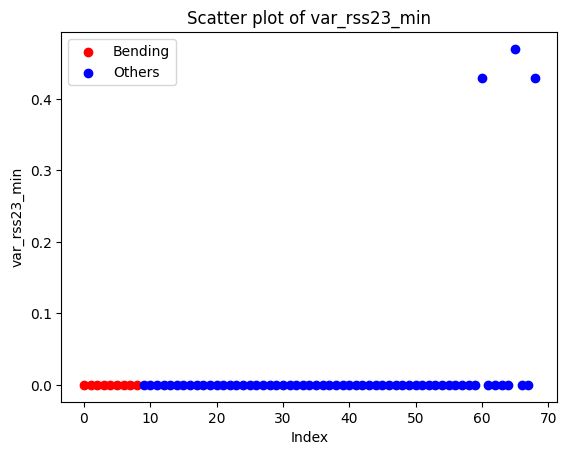

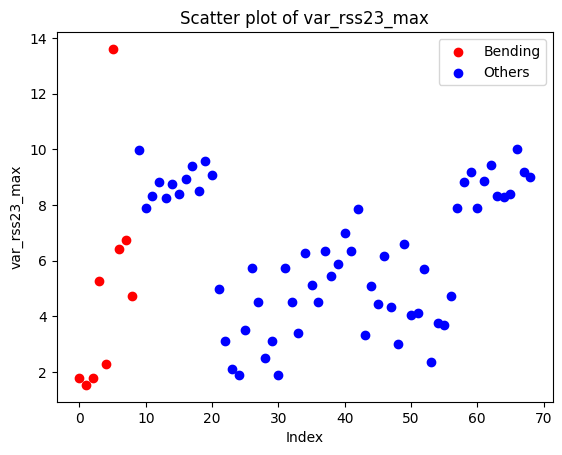

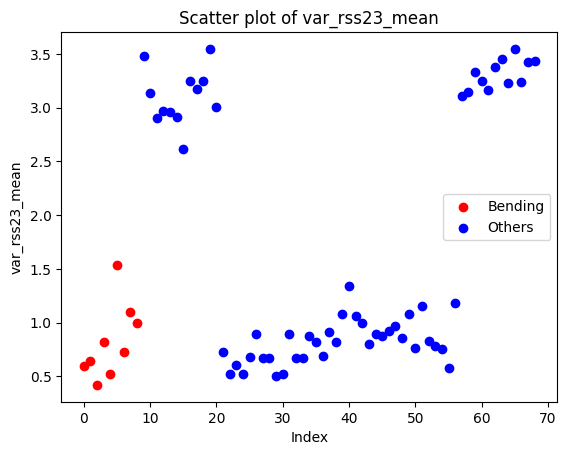

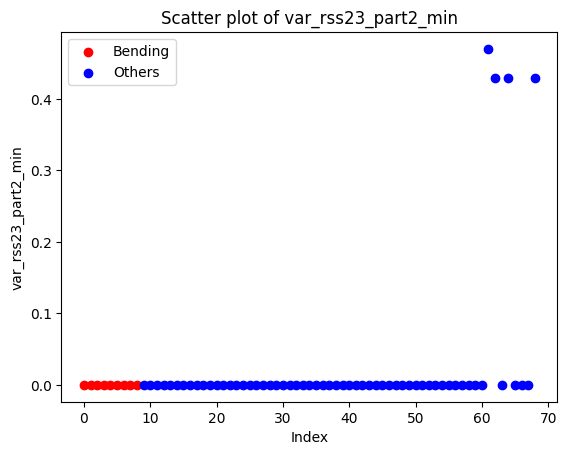

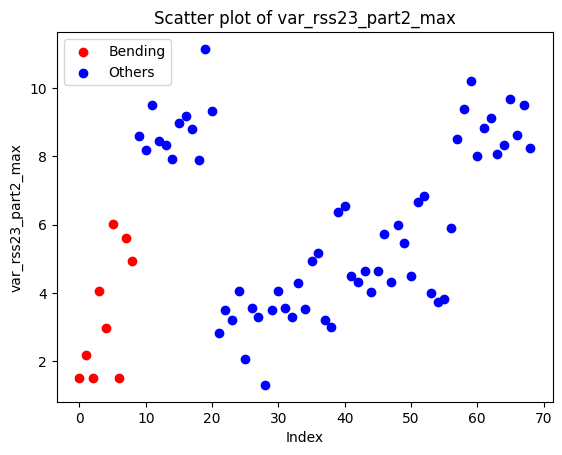

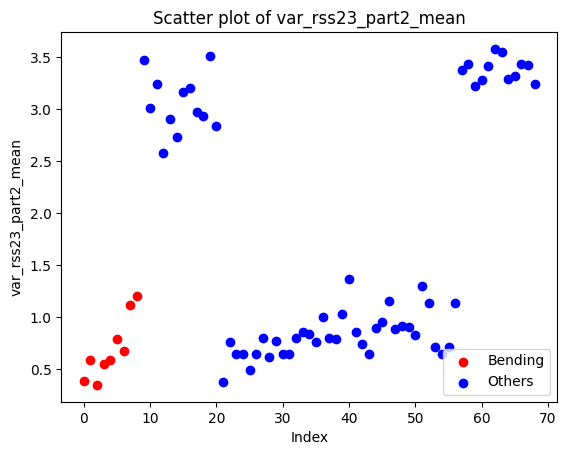

In [125]:

#STEP 3 - Create scatter plots showing color to distinguish bending vs. other activities for HALVED DATASET.

#filtering out bending into a diff dataframe

df_bending_train_halved = features_df_halved[features_df_halved['df_name'].str.contains('bending')]

df_others_train_halved = features_df_halved[~features_df_halved['df_name'].str.contains('bending')]


features = ['avg_rss12_min', 'avg_rss12_max', 'avg_rss12_mean',
       'avg_rss12_part2_min', 'avg_rss12_part2_max', 'avg_rss12_part2_mean',
       'var_rss12_min', 'var_rss12_max', 'var_rss12_mean',
       'var_rss12_part2_min', 'var_rss12_part2_max', 'var_rss12_part2_mean',
       'var_rss23_min', 'var_rss23_max', 'var_rss23_mean',
       'var_rss23_part2_min', 'var_rss23_part2_max', 'var_rss23_part2_mean']

    
for feature in features:    
    # Create a scatter plot for df_bending_train with red color
    plt.scatter(df_bending_train_halved.index, df_bending_train_halved[feature], color='red', label='Bending')

    # Create a scatter plot for df_others_train with blue color
    plt.scatter(df_others_train_halved.index, df_others_train_halved[feature], color='blue', label='Others')

    # Adding title and labels
    plt.title(f'Scatter plot of {feature}')
    plt.xlabel('Index')
    plt.ylabel(f'{feature}')

    # Adding legend to specify which color represents which DataFrame
    plt.legend()

    # Display the plot
    plt.show()

### Notes: I see a difference, but in both cases the data seems well seperated so splitting the data may not be necessary here

# 2 (a) iii

Break each time series in your training set into
l
∈ {
1
,
2
, . . . ,
20
}
time series
of approximately equal length and use logistic regression
5
to solve the binary
classification problem, using time-domain features. Remember that breaking
each of the time series does not change the number of instances. It only
changes the number of features for each instance. Calculate the p-values for
your logistic regression parameters in each model corresponding to each value
of
l
and refit a logistic regression model using your pruned set of features.
6
Alternatively, you can use backward selection using sklearn.feature
selection
or glm in R. Use 5-fold cross-validation to determine the best value of the pair
(
l, p
), where
p
is the number of features used in recursive feature elimination.
Explain what the right way and the wrong way are to perform cross-validation
in this problem.
7
Obviously, use the right way! Also, you may encounter the
problem of class imbalance, which may make some of your folds not having
any instances of the rare class. In such a case, you can use
stratifiedcross
validation.
Research what it means and use it if needed.

In [126]:
#STEP ONE: CREATE FUNCTION TO MAKE NEW SPLIT DATAFRAMES GIVEN AN L VALUE


# Column names
column_names = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']


#df = dataframe to split, l = number of parts to split into, returns list of split dataframes
def split_dataframe(df, l):
    df = df[column_names]

    split_len = len(df) // l
    splits = []
      
    for i in range(l):
        if i == l - 1:  # Grab any remaining rows for the last split
            split = df.iloc[i*split_len:]
        else:
            split = df.iloc[i*split_len:(i+1)*split_len]

        # Rename columns based on the split number
        split.columns = [f'{col}_part{i+1}' for col in split.columns]
        
        # Reset index so they align correctly when concatenated
        split.reset_index(drop=True, inplace=True)
        splits.append(split)
    
    # Concatenate all splits horizontally
    concatenated_df = pd.concat(splits, axis=1)

    
    return concatenated_df


In [127]:
#STEP TWO: GET A TIME DOMAIN FEATURE DATAFRAME FOR EACH L. STORE EACH DATAFRAME IN A DICTIONARY. 


#given an l value, loop through every single df and output a time extracted df. Thus, need a for loop that interates through each l, and creates a list of 20 dictionaries

#l = list(range(1, 21, 1))


#initializing a dicitonary to store 20 dataframes of time domain features based on the l value
time_domain_features_dict = {}

for l in range(1,21):

    #Creating feature extraction df

    # Initialize a list to store the feature data. This is a list of dictionaries, where each dictionary represents feature data for each df
    feature_data = []

    # Iterate through each DataFrame in the dictionary. df_name = key (the name of the df) and df = value (the dataframe itself)
    for df_name, df in train_dataframes.items():

        #calling function to obtain the split and concatenated dataframe, based on the current l
        df_split = split_dataframe(df, l)
        
        # Initialize a dictionary to store features. This is the first key-value pair to signl which df we are on 
        features = {'df_name': df_name}
        
        # Iterate through each time series in the DataFrame. This is adding additional key value pairs for the features min, max, etc
        for col in df_split.columns:
            # Calculate the desired statistics
            features[f'{col}_min'] = df_split[col].min()
            features[f'{col}_max'] = df_split[col].max()
            features[f'{col}_mean'] = df_split[col].mean()
            

        # Append the features dictionary to the feature_data list
        feature_data.append(features)

    # Convert the feature_data list to a DataFrame
    features_df = pd.DataFrame(feature_data)

    #storing to dictionary
    time_domain_features_dict[f'features_l{l}'] = features_df


#access a single df in the dictionary --> time_domain_features_dict['features_l20']

In [132]:
time_domain_features_dict['features_l4']

df_name  avg_rss12_part1_min  avg_rss12_part1_max  \
0   bending1_df_3                38.75                45.00   
1   bending1_df_4                35.75                47.75   
2   bending1_df_5                33.75                45.00   
3   bending1_df_6                41.00                46.75   
4   bending1_df_7                40.75                45.00   
..            ...                  ...                  ...   
64  walking_df_11                19.50                45.00   
65  walking_df_12                22.00                44.50   
66  walking_df_13                22.00                43.33   
67  walking_df_14                24.33                43.50   
68  walking_df_15                21.75                43.75   

    avg_rss12_part1_mean  var_rss12_part1_min  var_rss12_part1_max  \
0              43.629667                 0.00                 1.50   
1              43.995000                 0.00                 3.00   
2              40.910000                 0.00                 2.17   
3              44.932583                 0.00                 1.30   
4              42.798750                 0.00                 1.12   
..                   ...                  ...                  ...   
64             33.674583                 0.47                 9.76   
65             34.258250                 0.00                13.47   
66             34.123083                 0.00                 9.81   
67             34.792083                 0.00                14.82   
68             35.516833                 0.00                11.65   

    var_rss12_part1_mean  avg_rss13_part1_min  avg_rss13_part1_max  \
0               0.374333                14.25                25.00   
1               0.508083                11.00                30.00   
2               0.630833                 3.00                28.00   
3               0.096500                 7.75                26.67   
4               0.383750                 4.00                26.33   
..                   ...                  ...                  ...   
64              4.416250                 7.33                22.25   
65              4.958417                 9.25                22.00   
66              4.552417                 9.50                22.67   
67              4.459583                 7.25                24.25   
68              4.419083                 9.00                20.67   

    avg_rss13_part1_mean  var_rss13_part1_min  var_rss13_part1_max  \
0              23.081167                 0.00                 2.74   
1              22.918667                 0.00                 3.70   
2              19.268083                 0.00                 5.97   
3              18.038333                 0.00                10.03   
4              15.698667                 0.00                 5.17   
..                   ...                  ...                  ...   
64             15.276083                 0.43                 7.85   
65             15.549250                 0.43                 9.00   
66             15.615750                 0.00                 7.15   
67             15.425500                 0.00                 8.34   
68             15.126833                 0.00                 8.64   

    var_rss13_part1_mean  avg_rss23_part1_min  avg_rss23_part1_max  \
0               0.405500                30.00                37.50   
1               0.664750                32.00                38.67   
2               1.182667                24.00                35.25   
3               1.231083                15.00                33.50   
4               0.922917                11.33                30.75   
..                   ...                  ...                  ...   
64              3.170083                 8.25                25.00   
65              3.242500                 6.25                22.75   
66              3.139250                 7.00                22.33   
67              3.191167      

In [142]:
#FINAL PRODUCT




# Dictionary to store best number of features (p) and their corresponding cross-validation scores for each l
best_features_dict = {}

# Loop over each l value in your dictionary
for l, df in time_domain_features_dict.items():
    
    # Convert 'df_name' to a binary target: 1 if it contains "bending", 0 otherwise
    df['target'] = df['df_name'].apply(lambda x: 1 if "bending" in x else 0)
    # Extract features and target variable
    y = df['target']
    X = df.drop(columns=['target', 'df_name'])

    
    # Initialize a logistic regression classifier
    estimator = LogisticRegression(max_iter=10000)
    
    # Create the RFE object with 5-fold stratified cross-validation
    rfecv = RFECV(estimator=estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
    
    # Fit RFECV
    rfecv.fit(X, y)
    
    # Store the number of best features and their corresponding cross-validation score
    best_features_dict[l] = {'best_p': rfecv.n_features_, 'cross_val_score': np.mean(rfecv.cv_results_['split0_test_score'])}  # assuming 5-fold CV}

# Now, find the (l, p) pair with the best cross-validation score
best_l = max(best_features_dict, key=lambda k: best_features_dict[k]['cross_val_score'])
best_p = best_features_dict[best_l]['best_p']

print(f"The best (l, p) pair is ({best_l}, {best_p}) with a cross-validation score of {best_features_dict[best_l]['cross_val_score']}")




/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py

The best (l, p) pair is (features_l8, 13) with a cross-validation score of 1.0


In [250]:
best_l = 'features_l8'



### Answer: Right vs wrong way to perform cross validation 

The right way to perform cross-validation involves partitioning the training dataset into a number of subsets (AKA) folds, and training on all but one of these folds, using the left out fold as the validation set. Ensure data leakage is avoided (validation data should not influence the training process). Once cross-validation is completed, a final model should be trained on the entire training dataset for deployment or further testing on a separate hold-out set.

The wrong way to approach cross-validation includes missteps like using the test data during cross-validation, not randomizing the data when creating folds (leads to bias), and treating the averaged model from cross-validation as the final deployable model without retraining on the full training data.

# 2 (a) iv

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py

[[60  0]
 [ 0  9]]


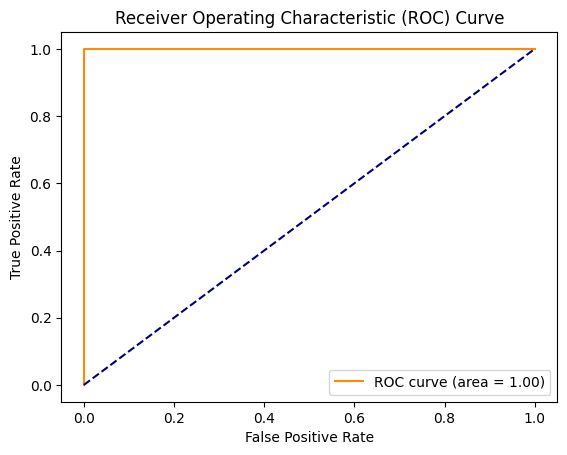

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                   69
Model:                            GLM   Df Residuals:                       55
Model Family:                Gaussian   Df Model:                           13
Link Function:               Identity   Scale:                        0.032672
Method:                          IRLS   Log-Likelihood:                 27.949
Date:                Thu, 05 Oct 2023   Deviance:                       1.7970
Time:                        10:45:24   Pearson chi2:                     1.80
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9327
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3841 

In [253]:


# Extract data for the best l
df_best = time_domain_features_dict[best_l]
df_best['target'] = df_best['df_name'].apply(lambda x: 1 if "bending" in x else 0)
y = df_best['target']
X = df_best.drop(columns=['target', 'df_name','activity'])

# Initialize a logistic regression classifier
estimator = LogisticRegression(max_iter=10000)

# Use RFECV to get the best features
selector = RFECV(estimator=estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
selector = selector.fit(X, y)
selected_columns = X.columns[selector.support_]

# Retrain the model with the best features
X_selected = X[selected_columns]
model = LogisticRegression(max_iter=10000)
model.fit(X_selected, y)

# Confusion matrix
y_pred = model.predict(X_selected)
print(confusion_matrix(y, y_pred))

# ROC and AUC
y_prob = model.predict_proba(X_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


X_stats = sm.add_constant(X[selected_columns])

# Use GLM with Binomial family for logistic regression
binom_model = sm.GLM(y, X_stats)

binom_results = binom_model.fit()

print(binom_results.summary())

# 2(a) V

In [193]:
#STEP ONE: Obtain test set for l = 8
feature_data = []
# Iterate through each DataFrame in the dictionary. df_name = key (the name of the df) and df = value (the dataframe itself)
for df_name, df in test_dataframes.items():

    #calling function to obtain the split and concatenated dataframe, based on the current l
    df_split = split_dataframe(df, 8)
    
    # Initialize a dictionary to store features. This is the first key-value pair to signl which df we are on 
    features = {'df_name': df_name}
    
    # Iterate through each time series in the DataFrame. This is adding additional key value pairs for the features min, max, etc
    for col in df_split.columns:
        # Calculate the desired statistics
        features[f'{col}_min'] = df_split[col].min()
        features[f'{col}_max'] = df_split[col].max()
        features[f'{col}_mean'] = df_split[col].mean()
        

    # Append the features dictionary to the feature_data list
    feature_data.append(features)

# Convert the feature_data list to a DataFrame
test_features_df = pd.DataFrame(feature_data)


In [203]:
#STEP TWO: test classifier on test set

test_features_df['target'] = test_features_df['df_name'].apply(lambda x: 1 if "bending" in x else 0)
y_test = test_features_df['target']

X_test = test_features_df[selected_columns]

y_test_pred = model.predict(X_test)

test_accuracy = np.mean(y_test == y_test_pred)



print(f"Cross-Validation Accuracy: {best_features_dict[best_l]['cross_val_score']*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Cross-Validation Accuracy: 100.00%
Test Accuracy: 94.74%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


# 2 (a) Vi

### Answer: 
The high cross-validation accuracy suggests that the model found patterns in the training data that allow it to separate the classes well.
The slight drop in test accuracy indicates that while these patterns largely hold, they aren't universal. There are some instances in the test set that don't fit the patterns the model learned. This suggests the separation isn't causing significant instability in logistic regression parameters, as the model can still generalize to unseen data with high accuracy 

# 2(a) Vii

### Answer:

Yes there is a class imbalance. There are 9 cases of bending and 60 of other. So the there are different frequencies of classes. 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and 

[[60  0]
 [ 0 60]]


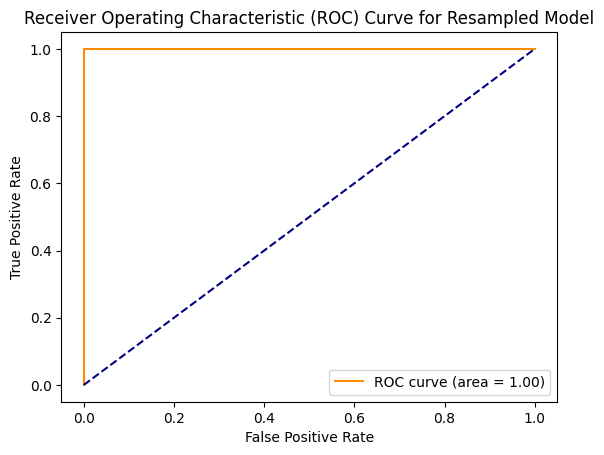

In [261]:
#building a logistic regression model based on case-control sampling. Report the confusion matrix, ROC, and AUC of the model


# Apply SMOTE to generate synthetic examples for the training data
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Train a logistic regression model on the resampled data
model_resampled = LogisticRegression(max_iter=10000)
model_resampled.fit(X_resampled, y_resampled)


y_pred_resampled = model_resampled.predict(X_resampled)

print(confusion_matrix(y_resampled, y_pred_resampled))

#Compute and plot the ROC and AUC:
y_prob_resampled = model_resampled.predict_proba(X_resampled)[:, 1]
fpr_resampled, tpr_resampled, thresholds_resampled = roc_curve(y_resampled, y_prob_resampled)
roc_auc_resampled = auc(fpr_resampled, tpr_resampled)

plt.figure()
plt.plot(fpr_resampled, tpr_resampled, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_resampled)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Resampled Model')
plt.legend(loc="lower right")
plt.show()



# 2(B)i


Repeat 2(a)iii using
L
1
-penalized logistic regression,

i.e. instead of using p-
values for variable selection, use
L
1
regularization. Note that in this problem,
you have to cross-validate for both
l
, the number of time series into which you
break each of your instances, and
λ
, the weight of
L
1
penalty in your logistic
regression objective function (or
C
, the budget). Packages usually perform
cross-validation for
λ
automatically.


In [204]:
# Finding best (L, p) using L1 penalized logistic regression


# Dictionary to store the best performance for each l
performance_dict = {}

# Loop over each l value in your dictionary
for l, df in time_domain_features_dict.items():
    
    # Convert 'df_name' to a binary target: 1 if it contains "bending", 0 otherwise
    df['target'] = df['df_name'].apply(lambda x: 1 if "bending" in x else 0)
    
    # Extract features and target variable
    y = df['target']
    X = df.drop(columns=['target', 'df_name'])

    # Initialize a L1-penalized logistic regression classifier with cross-validation
    # This will automatically find the best C value using StratifiedKFold
    estimator = LogisticRegressionCV(Cs=10, penalty='l1', solver='saga', max_iter=10000, cv=StratifiedKFold(5), scoring='accuracy')
    
    estimator.fit(X, y)
    
    # Store the score for the best C value
    performance_dict[l] = estimator.scores_[1].mean(axis=0).max()

# Now, find the l with the best cross-validation score
best_l = max(performance_dict, key=performance_dict.get)

print(f"The best l value is {best_l} with a cross-validation score of {performance_dict[best_l]:.2f}")


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py

The best l value is features_l1 with a cross-validation score of 1.00


# (b) ii

In [215]:


# Retraining model on all training data with best l and lambda value

# Extract the best l data
df_best = time_domain_features_dict[best_l]
df_best['target'] = df_best['df_name'].apply(lambda x: 1 if "bending" in x else 0)
y = df_best['target']
X = df_best.drop(columns=['target', 'df_name'])

# Train a L1-penalized logistic regression using the best C from the previous step
best_C = 1 / estimator.C_[0]  # C_ attribute provides the best inverse regularization strength found by LogisticRegressionCV

# 1. Use sklearn to determine significant features using L1-penalized logistic regression
clf_l1 = LogisticRegression(penalty='l1', C=best_C, solver='saga', max_iter=10000)
clf_l1.fit(X, y)

selected_features = X.columns[clf_l1.coef_[0] != 0]  # Features that weren't shrunk to zero by L1 penalty

# 2. Use statsmodels on those significant features
X_selected = sm.add_constant(X[selected_features])


# Use GLM with Binomial family for logistic regression
binom_model = sm.GLM(y, X_selected)

binom_results = binom_model.fit()

print(binom_results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                   69
Model:                            GLM   Df Residuals:                       63
Model Family:                Gaussian   Df Model:                            5
Link Function:               Identity   Scale:                        0.035187
Method:                          IRLS   Log-Likelihood:                 20.706
Date:                Thu, 05 Oct 2023   Deviance:                       2.2168
Time:                        08:08:56   Pearson chi2:                     2.22
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9012
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2968 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py

# Answer: The L1 penlized regression has fewer features, and smaller p values. While both models performed well during cross validation, L1 is the better model to use because of its simplicity and low p values. L1 penlized regression was easier to implement because I don't have to take an extra step to filter out the best features, it implicitly does this by setting the coefficients to zero. 

# 2 (C) i

In [222]:
# Find best L using L1 penalized regression for multinomial classification 

encoder = LabelEncoder()


# Dictionary to store the best performance for each l
performance_dict = {}

# Loop over each l value in your dictionary
for l, df in time_domain_features_dict.items():
    
    df['activity'] = df['df_name'].str.extract(r'(\w+?)\d*_df')

    # Convert 'df_name' to numerical labels
    df['target'] = encoder.fit_transform(df['activity'])
    
    # Extract features and target variable
    y = df['target']
    X = df.drop(columns=['target', 'df_name','activity'])

    # Initialize a L1-penalized multinomial logistic regression classifier with cross-validation
    estimator = LogisticRegressionCV(
        Cs=10, 
        penalty='l1', 
        solver='saga', 
        max_iter=10000, 
        cv=StratifiedKFold(5), 
        scoring='accuracy', 
        multi_class='multinomial'  # This is important for multinomial regression
    )
    
    estimator.fit(X, y)
    
    # Store the score for the best C value
    performance_dict[l] = estimator.scores_[1].mean(axis=0).max()

# Find the l with the best cross-validation score
best_l = max(performance_dict, key=performance_dict.get)

print(f"The best l value is {best_l} with a cross-validation score of {performance_dict[best_l]:.2f}")


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py

The best l value is features_l1 with a cross-validation score of 0.90


In [232]:
#Obtain test set for l = 1

feature_data = []
# Iterate through each DataFrame in the dictionary. df_name = key (the name of the df) and df = value (the dataframe itself)
for df_name, df in test_dataframes.items():

    #calling function to obtain the split and concatenated dataframe, based on the current l
    df_split = split_dataframe(df, 1)
    
    # Initialize a dictionary to store features. This is the first key-value pair to signl which df we are on 
    features = {'df_name': df_name}
    
    # Iterate through each time series in the DataFrame. This is adding additional key value pairs for the features min, max, etc
    for col in df_split.columns:
        # Calculate the desired statistics
        features[f'{col}_min'] = df_split[col].min()
        features[f'{col}_max'] = df_split[col].max()
        features[f'{col}_mean'] = df_split[col].mean()
        

    # Append the features dictionary to the feature_data list
    feature_data.append(features)

# Convert the feature_data list to a DataFrame
test_features_df = pd.DataFrame(feature_data)

encoder = LabelEncoder()

test_features_df['activity'] = test_features_df['df_name'].str.extract(r'(\w+?)\d*_df')

# Convert 'df_name' to numerical labels
test_features_df['target'] = encoder.fit_transform(test_features_df['activity'])

# Extract features and target variable
y_test = test_features_df['target']
X_test = test_features_df.drop(columns=['target', 'df_name','activity'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [234]:
#Retrain model given best 1 ( l = 1), then run model on test data and gett the test error


# Once you've identified best_l:
best_df = time_domain_features_dict[best_l]

# Extract activity and convert to numerical labels
best_df['activity'] = best_df['df_name'].str.extract(r'(\w+?)\d*_df')
best_df['target'] = encoder.fit_transform(best_df['activity'])

y = best_df['target']
X = best_df.drop(columns=['target', 'df_name', 'activity'])


# Train model on X_train and y_train
estimator.fit(X, y)


# Test the model on X_test
y_pred = estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - accuracy

print(f"Test Accuracy for best l ({best_l}): {accuracy:.4f}")
print(f"Test Error for best l ({best_l}): {test_error:.4f}")



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py

Test Accuracy for best l (features_l1): 0.8947
Test Error for best l (features_l1): 0.1053


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py

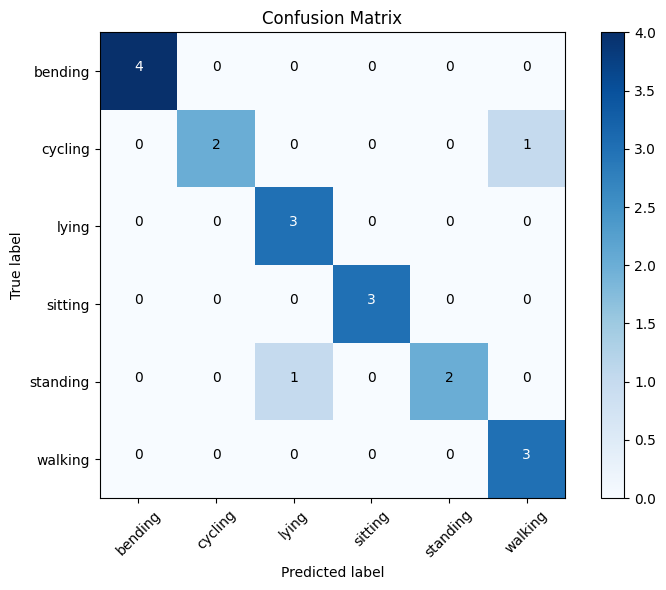

In [237]:


#confusion matrix

# Predict on the test set
y_pred = estimator.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(encoder.classes_))
plt.xticks(tick_marks, encoder.classes_, rotation=45)
plt.yticks(tick_marks, encoder.classes_)

# Display the values in the matrix
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py

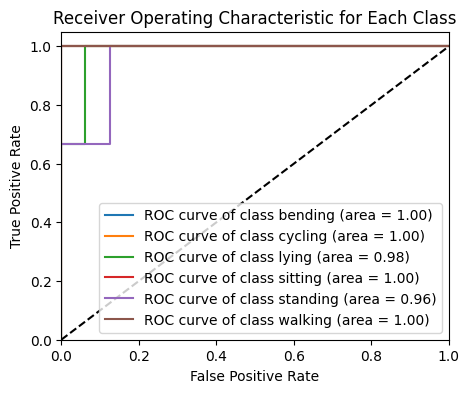

In [239]:
# ROC 



# Binarize the labels (convert them to one-hot encoded format)
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_prob = estimator.predict_proba(X_test)

n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(5, 4))
for i, label in enumerate(encoder.classes_):   # using encoder.classes_ to get original class names
    plt.plot(fpr[i], tpr[i],
             label=f'ROC curve of class {label} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Each Class')
plt.legend(loc="lower right")
plt.show()


# 2(c)ii

In [241]:



# Initialize the classifiers
gaussian_nb = GaussianNB()
multinomial_nb = MultinomialNB()

# Dictionaries to store the performance for each l
performance_gaussian = {}
performance_multinomial = {}

# Loop over each l value in your dictionary
for l, df in time_domain_features_dict.items():
    
    df['activity'] = df['df_name'].str.extract(r'(\w+?)\d*_df')
    df['target'] = encoder.fit_transform(df['activity'])
    
    # Extract features and target variable
    y = df['target']
    X = df.drop(columns=['target', 'df_name', 'activity'])
    
    # Evaluate GaussianNB using cross-validation
    score_gaussian = cross_val_score(gaussian_nb, X, y, cv=StratifiedKFold(5), scoring='accuracy').mean()
    performance_gaussian[l] = score_gaussian
    
    # Evaluate MultinomialNB using cross-validation
    score_multinomial = cross_val_score(multinomial_nb, X, y, cv=StratifiedKFold(5), scoring='accuracy').mean()
    performance_multinomial[l] = score_multinomial

# Find the l with the best cross-validation score for each classifier
best_l_gaussian = max(performance_gaussian, key=performance_gaussian.get)
best_l_multinomial = max(performance_multinomial, key=performance_multinomial.get)

print(f"GaussianNB: Best l value is {best_l_gaussian} with a cross-validation score of {performance_gaussian[best_l_gaussian]:.2f}")
print(f"MultinomialNB: Best l value is {best_l_multinomial} with a cross-validation score of {performance_multinomial[best_l_multinomial]:.2f}")


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and 

GaussianNB: Best l value is features_l2 with a cross-validation score of 0.84
MultinomialNB: Best l value is features_l5 with a cross-validation score of 0.81


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and 

### Answer: GaussianNB befored better during cross validation, with a cross-validation score of 0.84 (l = 2). MultinomialNB performed slightly worse with a cross-validation score of 0.81 (l = 5)

In [245]:
# evaluating on test set

# obtaining test set for l = 2 (for Guassian NB)

feature_data = []
# Iterate through each DataFrame in the dictionary. df_name = key (the name of the df) and df = value (the dataframe itself)
for df_name, df in test_dataframes.items():

    #calling function to obtain the split and concatenated dataframe, based on the current l
    df_split = split_dataframe(df, 2)
    
    # Initialize a dictionary to store features. This is the first key-value pair to signl which df we are on 
    features = {'df_name': df_name}
    
    # Iterate through each time series in the DataFrame. This is adding additional key value pairs for the features min, max, etc
    for col in df_split.columns:
        # Calculate the desired statistics
        features[f'{col}_min'] = df_split[col].min()
        features[f'{col}_max'] = df_split[col].max()
        features[f'{col}_mean'] = df_split[col].mean()
        

    # Append the features dictionary to the feature_data list
    feature_data.append(features)

# Convert the feature_data list to a DataFrame
test_features_nbg_df = pd.DataFrame(feature_data)

encoder = LabelEncoder()

test_features_nbg_df['activity'] = test_features_nbg_df['df_name'].str.extract(r'(\w+?)\d*_df')

# Convert 'df_name' to numerical labels
test_features_nbg_df['target'] = encoder.fit_transform(test_features_nbg_df['activity'])

# Extract features and target variable
y_test_gaussian = test_features_nbg_df['target']
X_test_gaussian = test_features_nbg_df.drop(columns=['target', 'df_name','activity'])


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [246]:
# obtaining test set for l = 5 (for multinomial NB)

feature_data = []
# Iterate through each DataFrame in the dictionary. df_name = key (the name of the df) and df = value (the dataframe itself)
for df_name, df in test_dataframes.items():

    #calling function to obtain the split and concatenated dataframe, based on the current l
    df_split = split_dataframe(df, 5)
    
    # Initialize a dictionary to store features. This is the first key-value pair to signl which df we are on 
    features = {'df_name': df_name}
    
    # Iterate through each time series in the DataFrame. This is adding additional key value pairs for the features min, max, etc
    for col in df_split.columns:
        # Calculate the desired statistics
        features[f'{col}_min'] = df_split[col].min()
        features[f'{col}_max'] = df_split[col].max()
        features[f'{col}_mean'] = df_split[col].mean()
        

    # Append the features dictionary to the feature_data list
    feature_data.append(features)

# Convert the feature_data list to a DataFrame
test_features_nbM_df = pd.DataFrame(feature_data)

encoder = LabelEncoder()

test_features_nbM_df['activity'] = test_features_nbM_df['df_name'].str.extract(r'(\w+?)\d*_df')

# Convert 'df_name' to numerical labels
test_features_nbM_df['target'] = encoder.fit_transform(test_features_nbM_df['activity'])

# Extract features and target variable
y_test_MN = test_features_nbM_df['target']
X_test_MN = test_features_nbM_df.drop(columns=['target', 'df_name','activity'])



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [248]:
#NEXT STEP: getting test error for each (multinomial and gaussian priors)

#TEST ERROR FOR GUASSIAN

# Select the best dataset for GaussianNB
best_gaussian_df = time_domain_features_dict[best_l_gaussian]

# Extract activity and convert to numerical labels
best_gaussian_df['activity'] = best_gaussian_df['df_name'].str.extract(r'(\w+?)\d*_df')
best_gaussian_df['target'] = encoder.fit_transform(best_gaussian_df['activity'])

y_gaussian = best_gaussian_df['target']
X_gaussian = best_gaussian_df.drop(columns=['target', 'df_name', 'activity'])

# Train model on the full training set for best_l_gaussian
gaussian_nb.fit(X_gaussian, y_gaussian)

# Test the model and compute test error
y_pred_gaussian = gaussian_nb.predict(X_test_gaussian)
accuracy_gaussian = accuracy_score(y_test_gaussian, y_pred_gaussian)
test_error_gaussian = 1 - accuracy_gaussian

#TEST ERROR FOR MULTINOMIAL

# Select the best dataset for MultinomialNB
best_multinomial_df = time_domain_features_dict[best_l_multinomial]

# Extract activity and convert to numerical labels
best_multinomial_df['activity'] = best_multinomial_df['df_name'].str.extract(r'(\w+?)\d*_df')
best_multinomial_df['target'] = encoder.fit_transform(best_multinomial_df['activity'])

y_multinomial = best_multinomial_df['target']
X_multinomial = best_multinomial_df.drop(columns=['target', 'df_name', 'activity'])

# Train model on the full training set for best_l_multinomial
multinomial_nb.fit(X_multinomial, y_multinomial)

# Test the model and compute test error
y_pred_multinomial = multinomial_nb.predict(X_test_MN)
accuracy_multinomial = accuracy_score(y_test_MN, y_pred_multinomial)
test_error_multinomial = 1 - accuracy_multinomial


print(f"GaussianNB Test Error: {test_error_gaussian:.4f}")
print(f"MultinomialNB Test Error: {test_error_multinomial:.4f}")


GaussianNB Test Error: 0.0526
MultinomialNB Test Error: 0.2105


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and 

### Answer: Gaussian performed better on the test set

# 2(a)iii

### Answer: Out of all the methods I've used for multi class classification the best performing model is Naive Bayes Gaussian, as it returned a test error of 0.0526, while Naive Bayes multinomial and Logistic L1 penalized multinomial regression returned test errors of 0.2105 and 0.1053 respectively 



# 3 and 4 ISLR 4.8.3 & 4.8.7

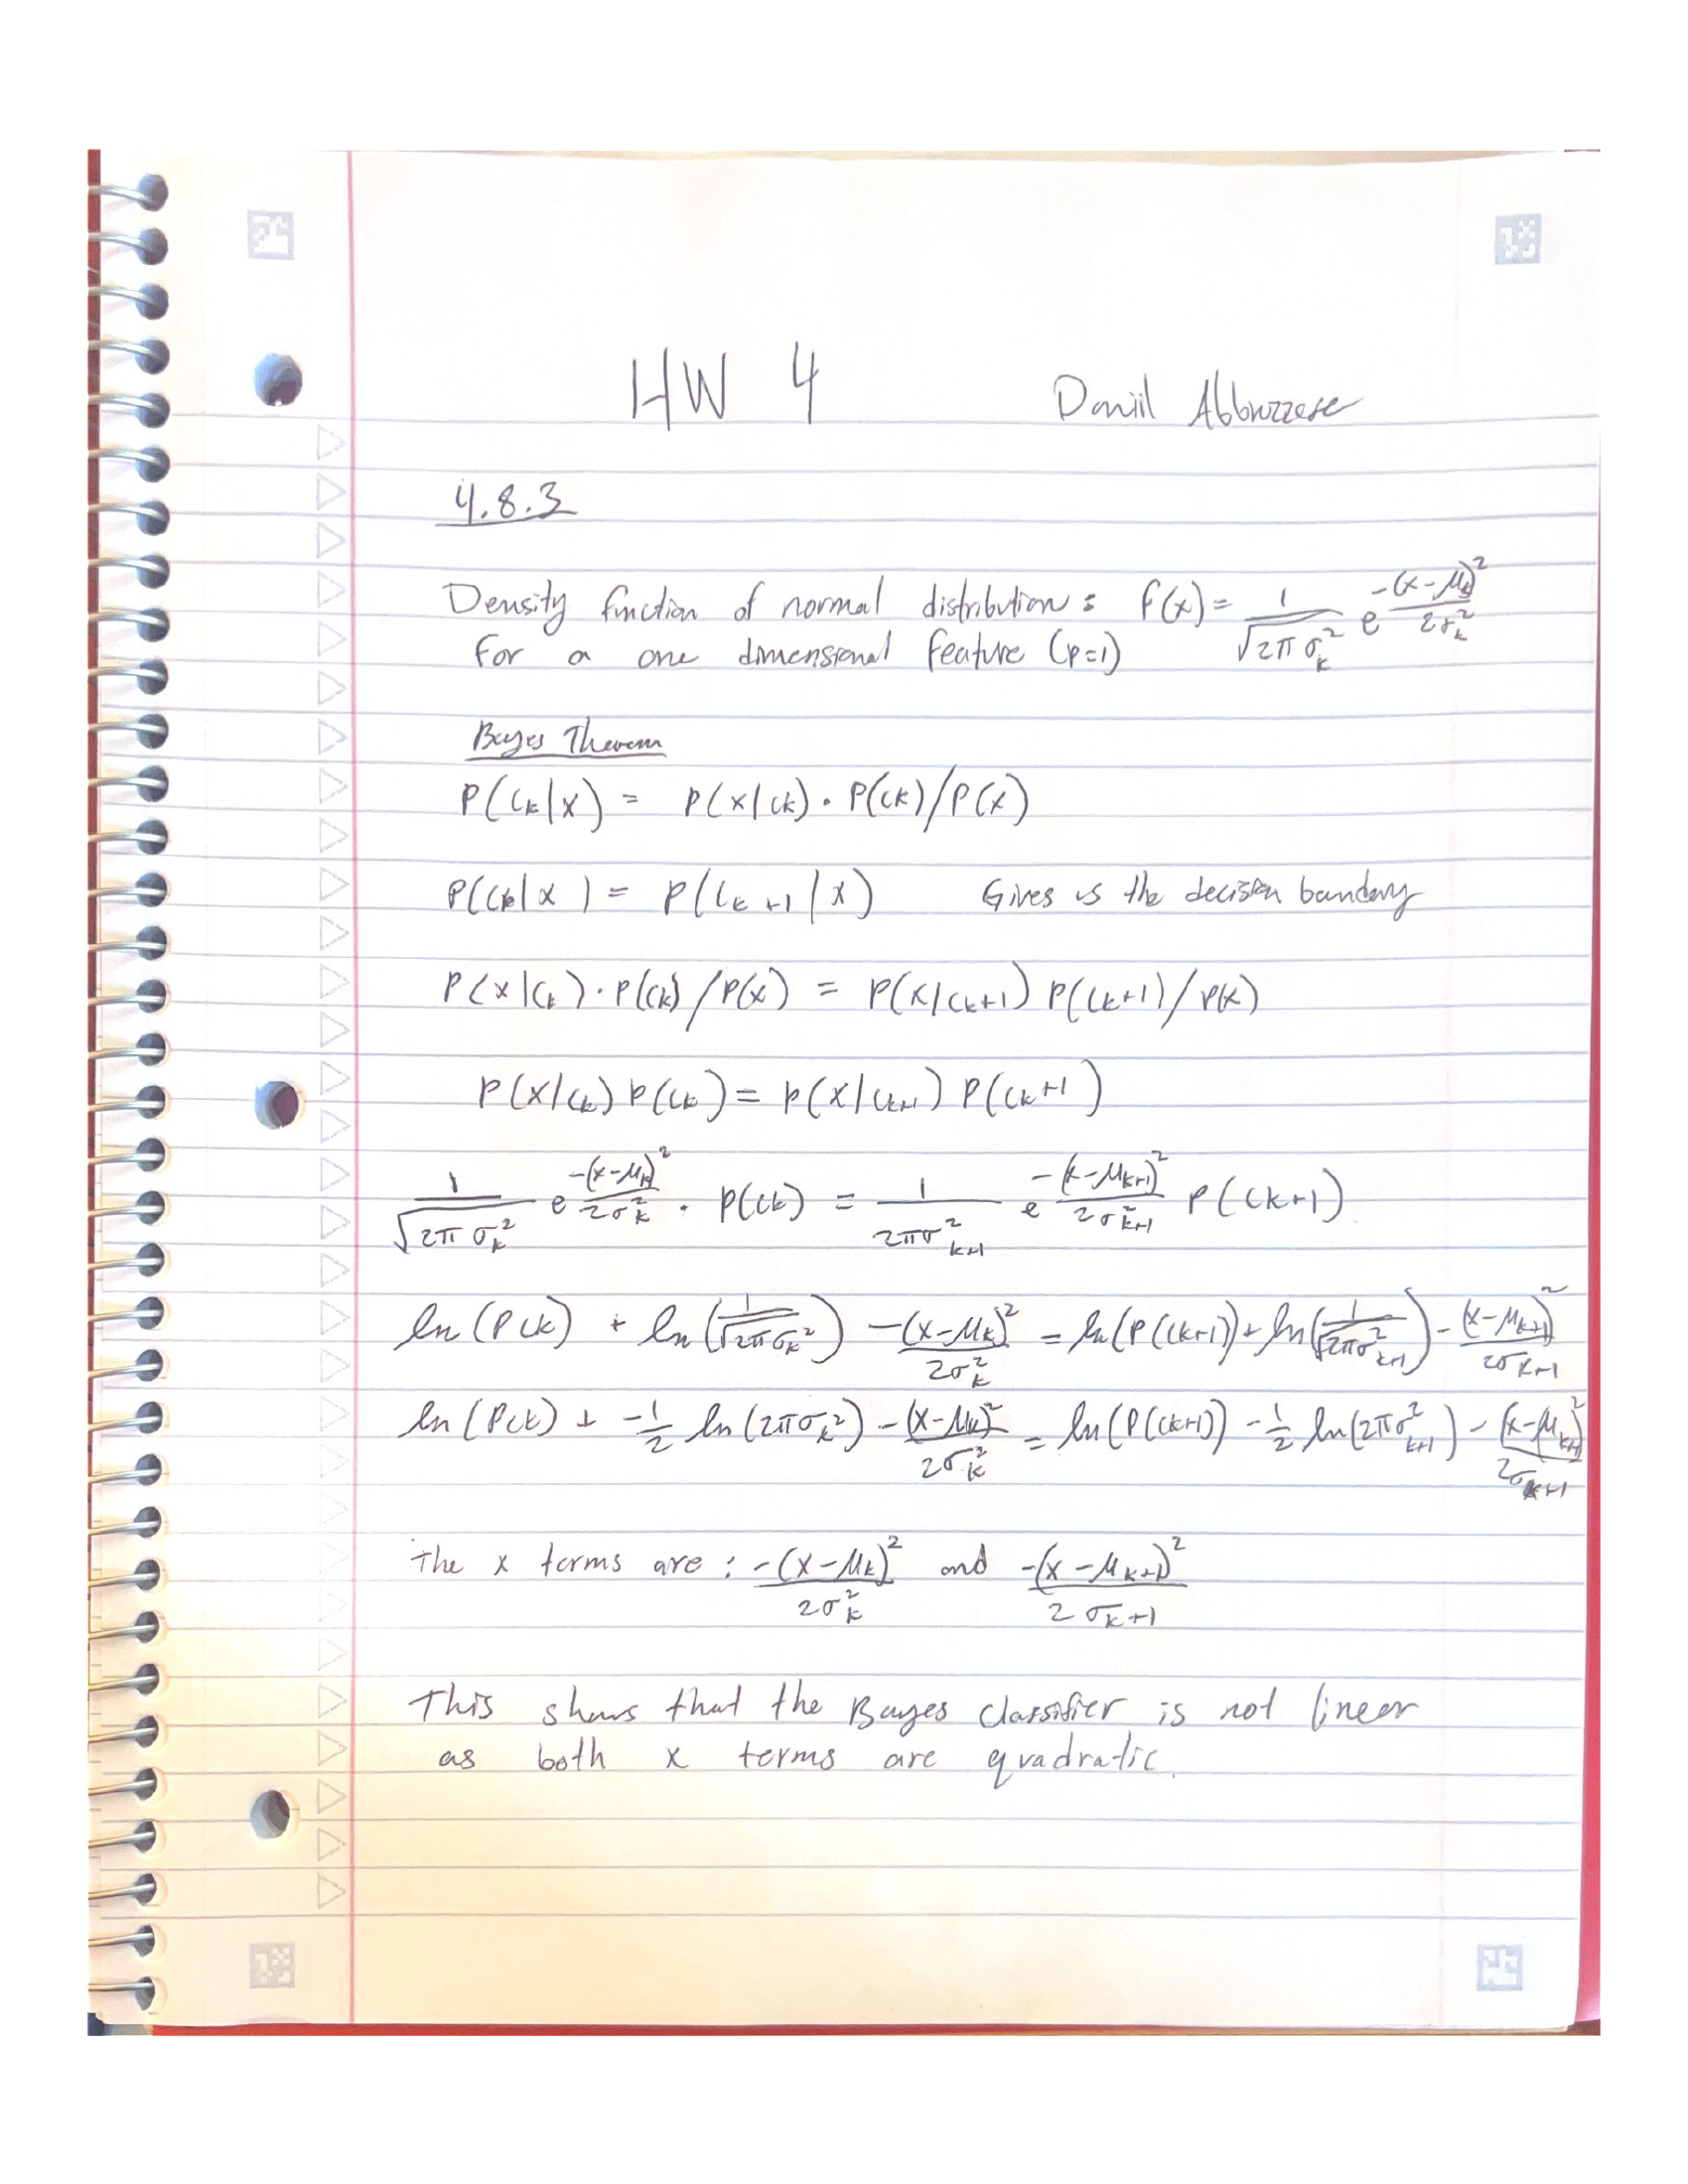

In [269]:


# Convert PDF to list of images
images = convert_from_path('../data/ISLR_answers.pdf')

# Display the first page (adjust the index for other pages)
display(images[0])


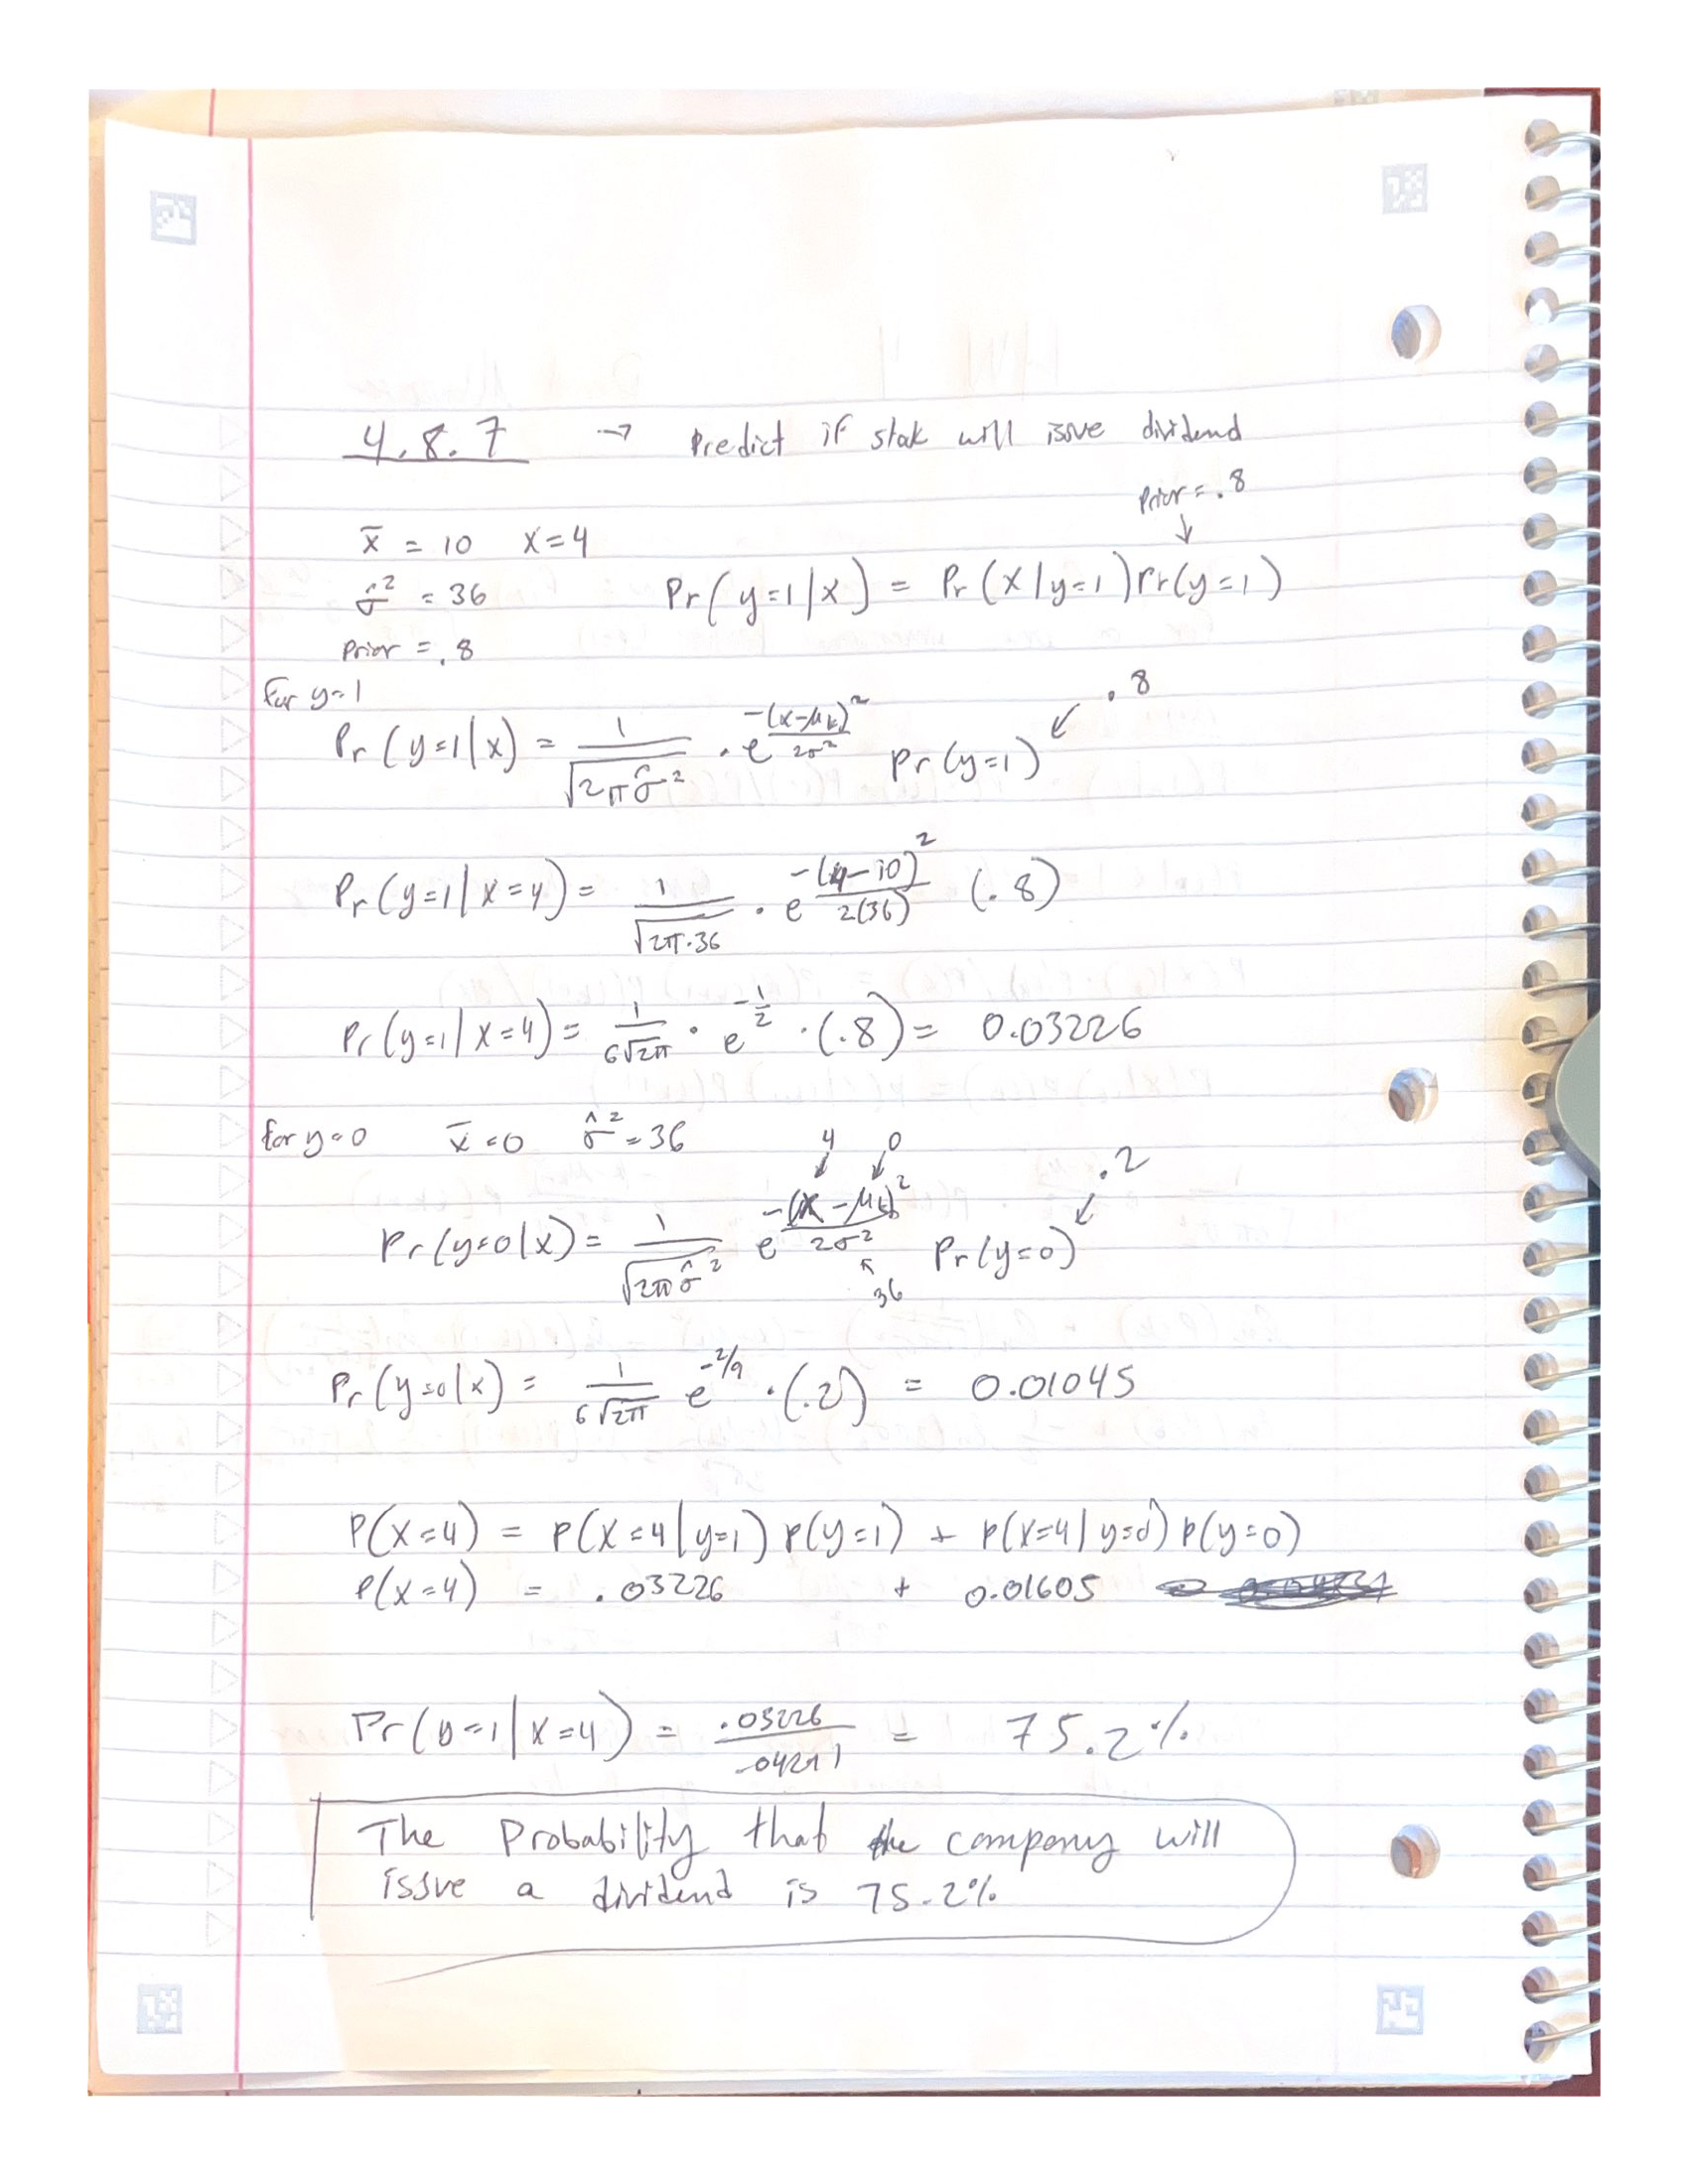

In [270]:
display(images[1])